In [1]:
import pandas as pd

In [133]:
import datetime

In [2]:
report = pd.read_json('final_annotation.json')

In [3]:
report


,id,annotations,file_upload,drafts,predictions,data,meta,created_at,updated_at,project
0,151295,"[{'id': 111270, 'completed_by': 70, 'result': ...",fb08df49-cord_train.json,[],[119463],{'image': '/data/upload/cord/train/receipt_002...,{},2022-01-31 11:00:35.122760+00:00,2022-02-09 13:11:04.347499+00:00,469
1,151286,"[{'id': 111256, 'completed_by': 70, 'result': ...",fb08df49-cord_train.json,[],[119454],{'image': '/data/upload/cord/train/receipt_007...,{},2022-01-31 11:00:35.122522+00:00,2022-02-09 13:10:02.133616+00:00,469
2,151280,"[{'id': 111247, 'completed_by': 70, 'result': ...",fb08df49-cord_train.json,[],[119448],{'image': '/data/upload/cord/train/receipt_001...,{},2022-01-31 11:00:35.122364+00:00,2022-02-09 13:08:05.489795+00:00,469
3,151262,"[{'id': 111211, 'completed_by': 70, 'result': ...",fb08df49-cord_train.json,[],[119430],{'image': '/data/upload/cord/train/receipt_001...,{},2022-01-31 11:00:35.121883+00:00,2022-02-09 13:04:57.291210+00:00,469
4,151261,"[{'id': 111210, 'completed_by': 70, 'result': ...",fb08df49-cord_train.json,[],[119429],{'image': '/data/upload/cord/train/receipt_003...,{},2022-01-31 11:00:35.121856+00:00,2022-02-09 13:02:19.901145+00:00,469
...,...,...,...,...,...,...,...,...,...,...
451,151143,"[{'id': 109594, 'completed_by': 70, 'result': ...",a8da9f7c-cord_val.json,[],[119311],{'image': '/data/upload/cord/val/receipt_00085...,{},2022-01-31 11:00:35.118592+00:00,2022-01-31 17:16:37.275028+00:00,469
452,151138,"[{'id': 109588, 'completed_by': 70, 'result': ...",a8da9f7c-cord_val.json,[],[119306],{'image': '/data/upload/cord/val/receipt_00082...,{},2022-01-31 11:00:35.118458+00:00,2022-01-31 16:28:57.503443+00:00,469
453,151137,"[{'id': 109587, 'completed_by': 70, 'result': ...",a8da9f7c-cord_val.json,[],[119305],{'image': '/data/upload/cord/val/receipt_00016...,{},2022-01-31 11:00:35.118431+00:00,2022-01-31 16:28:36.702045+00:00,469
454,151135,"[{'id': 109584, 'completed_by': 70, 'result': ...",a8da9f7c-cord_val.json,"[{'id': 68437, 'user': 'darya@ya.ru', 'created...",[119303],{'image': '/data/upload/cord/val/receipt_00077...,{},2022-01-31 11:00:35.118376+00:00,2022-01-31 16:26:34.141298+00:00,469


In [60]:
result = dict()

In [71]:
names = [name['image'].split('/')[5] for name in report['data']]

In [80]:
report['created_at'][0] - report['updated_at'][0]

Timedelta('-10 days +21:49:30.775261')

In [81]:
len(report['annotations'])

456

In [87]:
annotation_result = list()
annotation_prediction = list()
for i in range(len(report['annotations'])):
    annotation_result.append(len(report['annotations'][i][0]['result']))
    annotation_prediction.append(len(report['annotations'][i][0]['prediction']['result']))
    

In [93]:
report['created_at'][0].timestamp()-report['updated_at'][0].timestamp()

-785429.2247388363

In [97]:
#creation_date = [date.date() for date in report['created_at']] 

In [108]:
#creation_time = [date.round('S').time() for date in report['created_at']] 

In [111]:
#finish_date = [date.date() for date in report['updated_at']] 
#finish_time = [date.round('S').time() for date in report['updated_at']] 

In [285]:
from matplotlib import dates


In [277]:
creation_date = list()
finish_date = list()
creation_time = list()
finish_time = list()
lead_time = list()
ann_cd = list()
ann_fd = list()
for i in range(len(report['annotations'])):
    c_date = pd.Timestamp(report['annotations'][i][0]['created_at'])
    creation_date.append(c_date.date())
    creation_time.append(c_date.round('S').time())
    ann_cd.append(c_date)
    u_date = pd.Timestamp(report['annotations'][i][0]['updated_at'])
    finish_date.append(u_date.date())
    finish_time.append(u_date.round('S').time())
    lead_time.append(report['annotations'][i][0]['lead_time'])
    ann_fd.append(u_date)
    


In [288]:
datesdf = pd.DataFrame({'Name': names, 'ann_creation': ann_cd, 'ann_finish': ann_fd, 'task_creation': report['created_at'], 'task_finish': report['updated_at']})

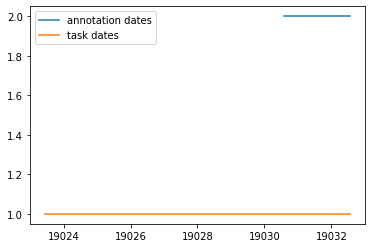

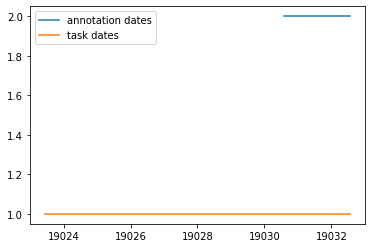

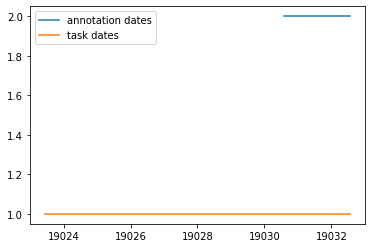

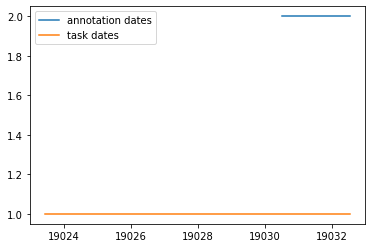

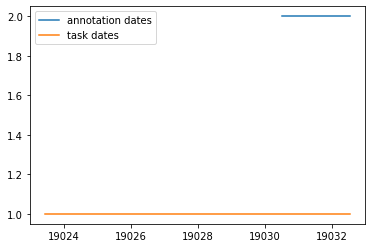

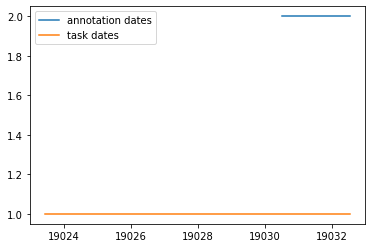

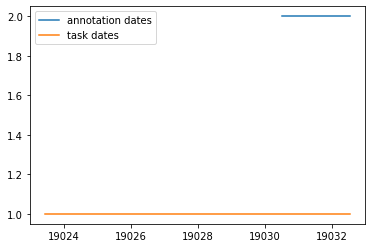

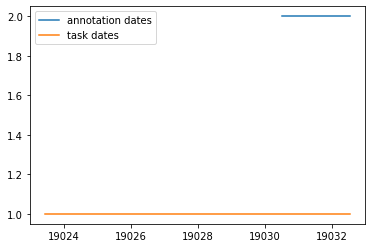

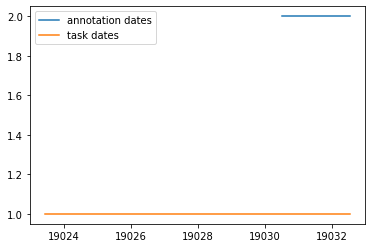

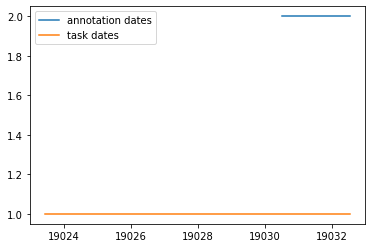

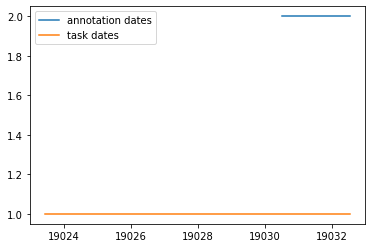

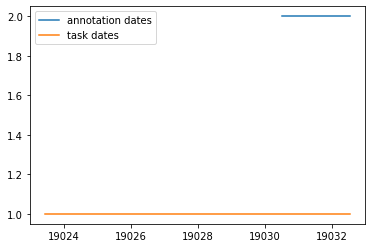

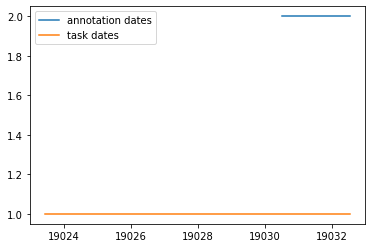

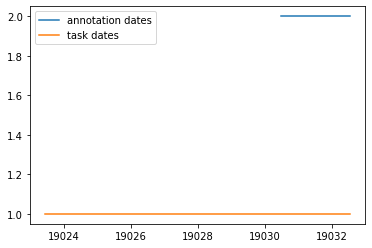

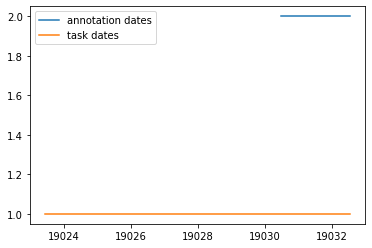

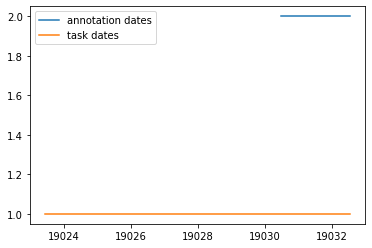

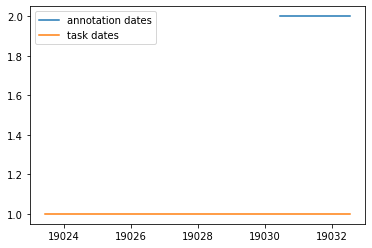

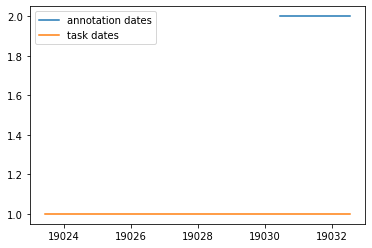

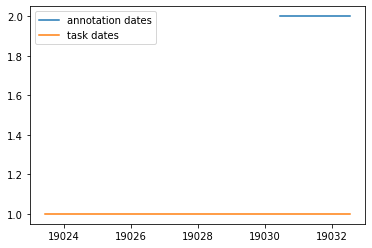

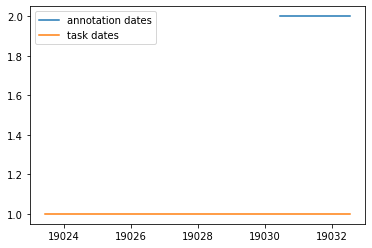

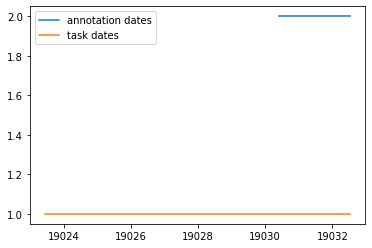

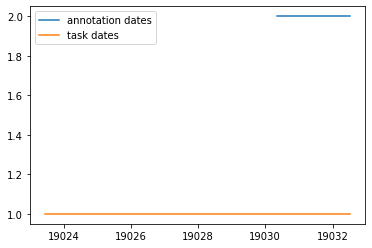

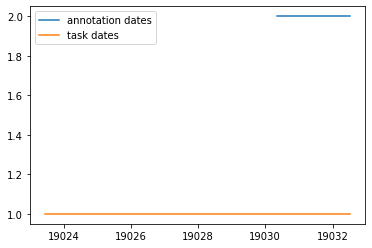

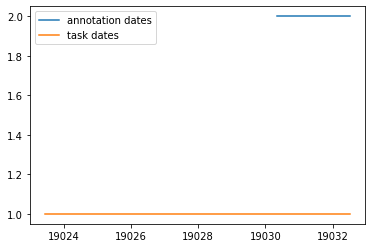

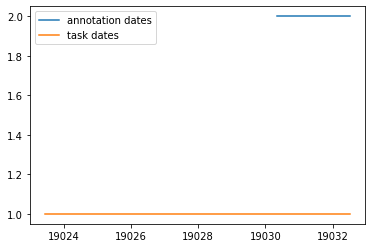

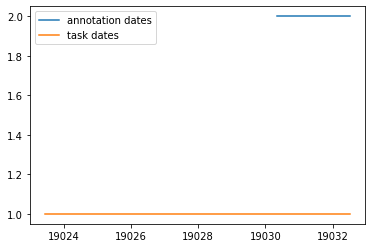

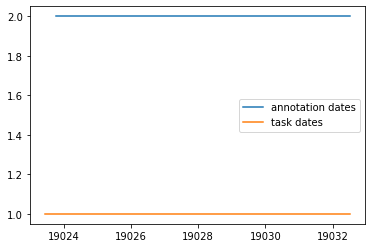

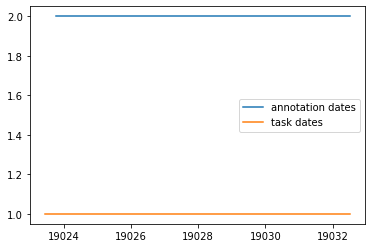

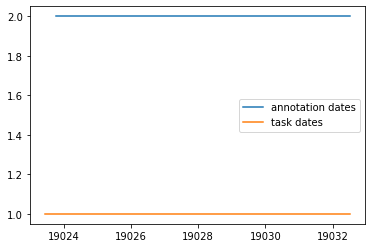

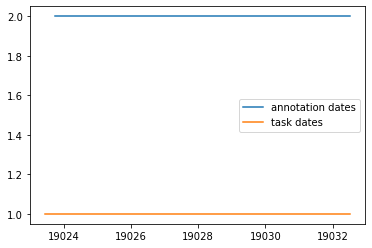

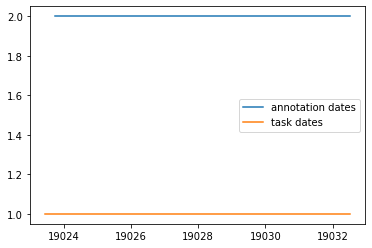

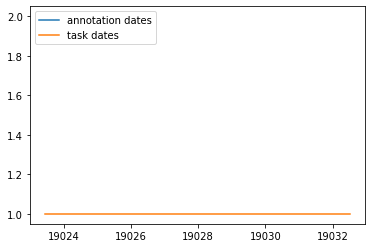

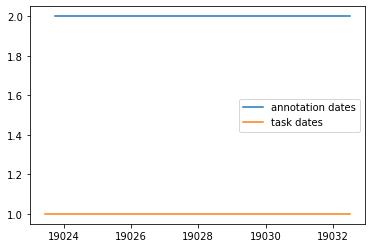

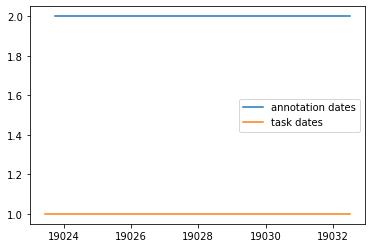

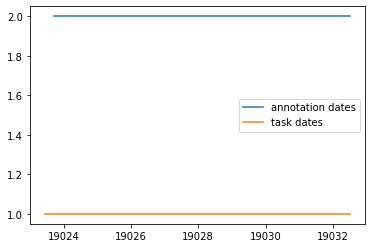

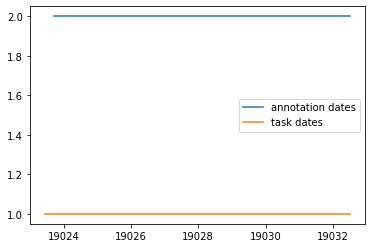

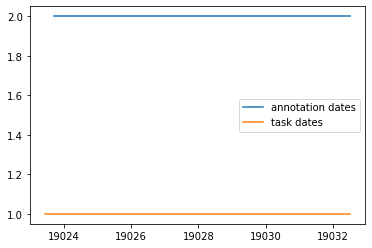

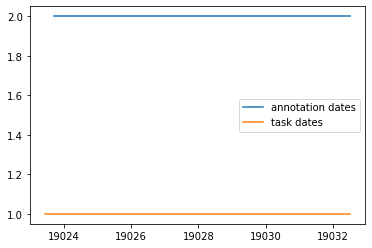

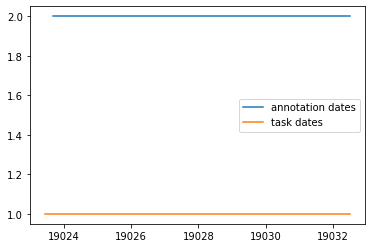

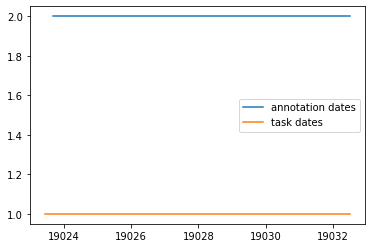

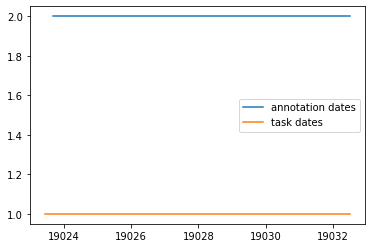

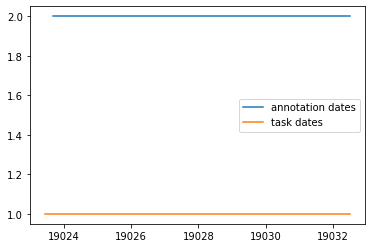

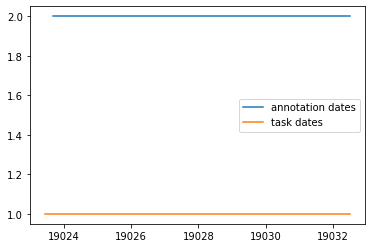

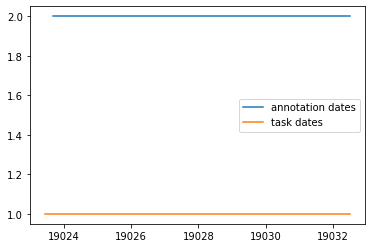

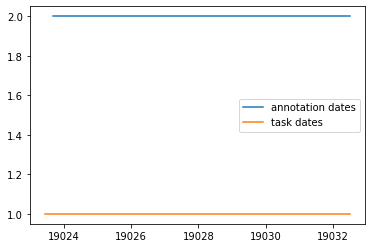

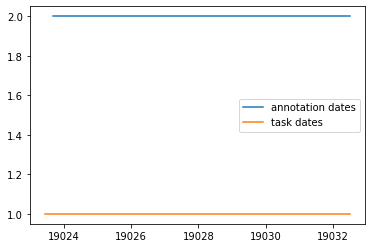

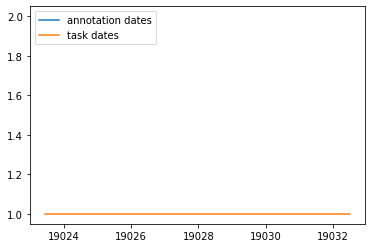

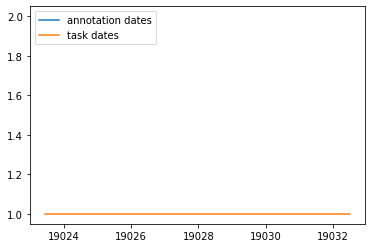

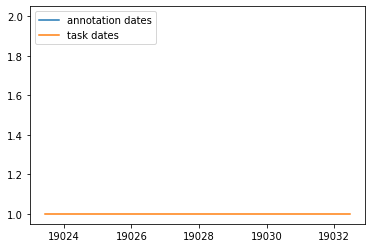

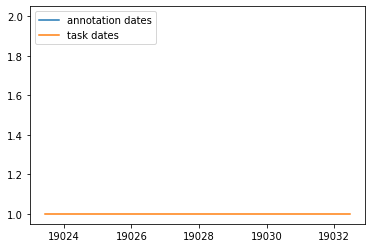

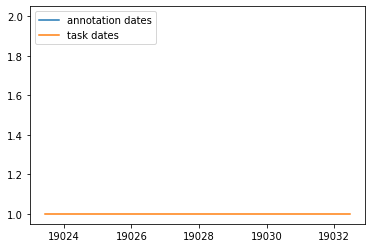

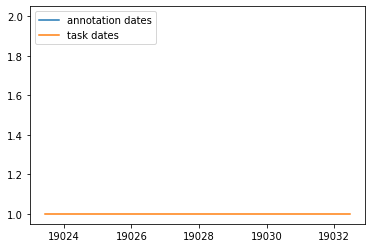

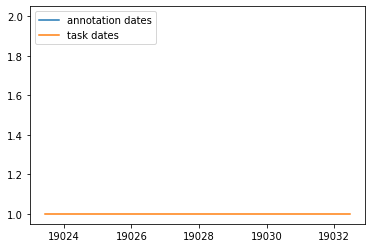

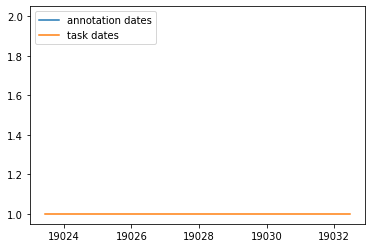

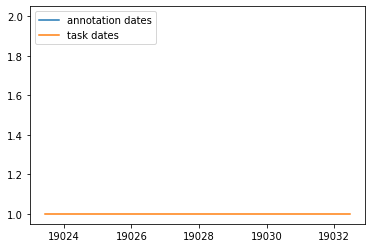

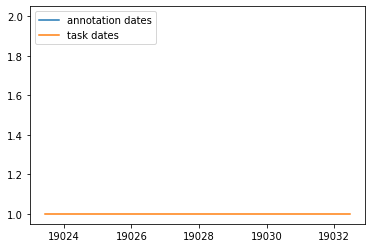

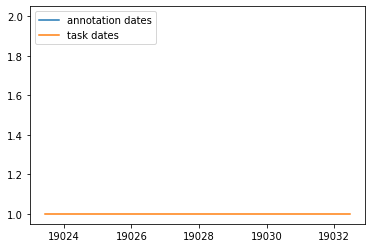

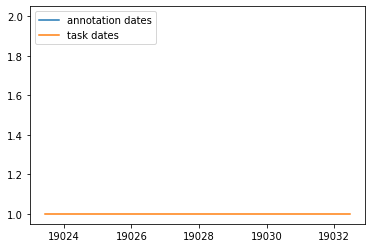

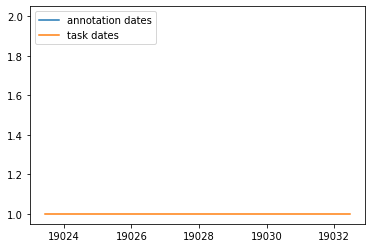

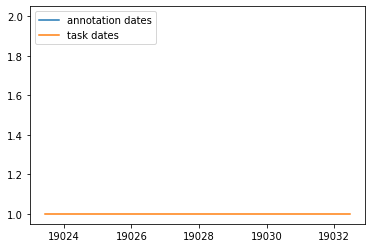

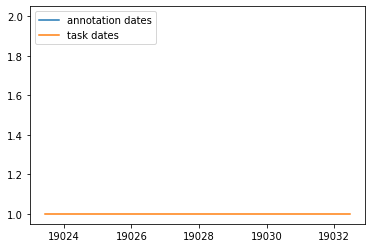

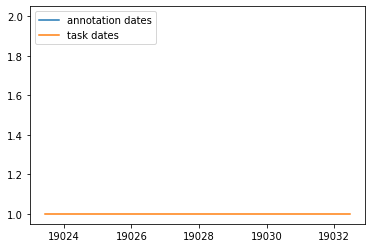

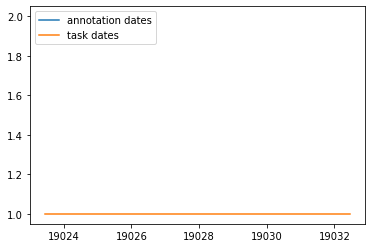

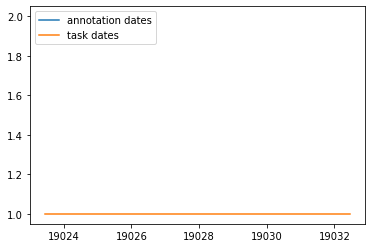

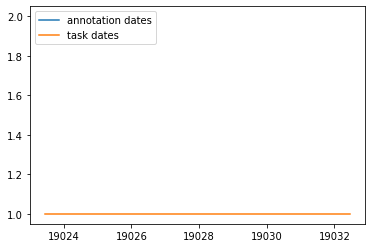

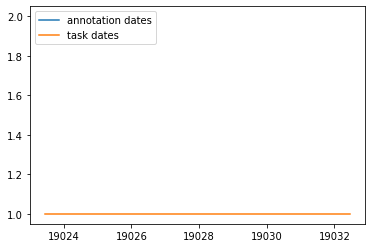

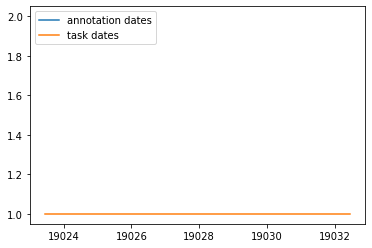

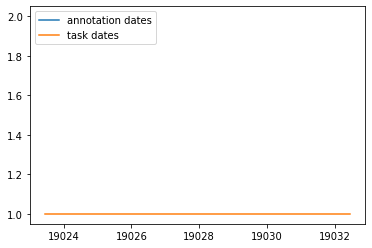

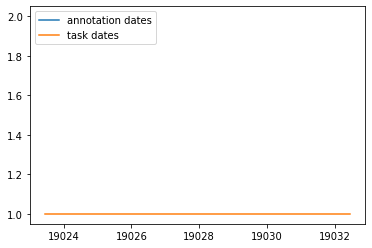

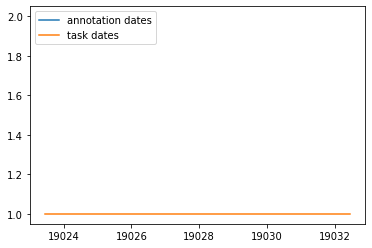

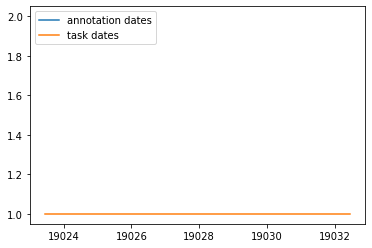

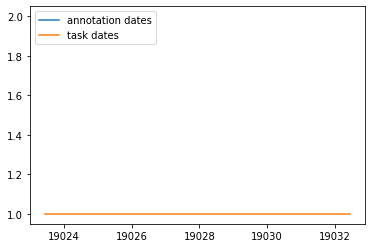

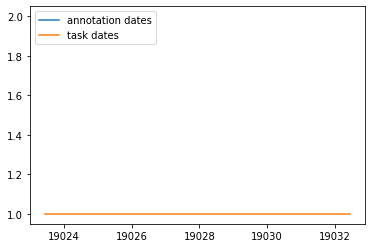

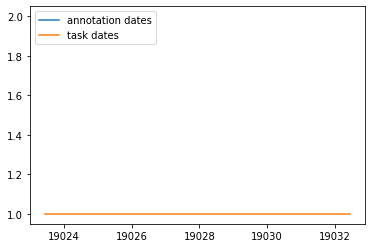

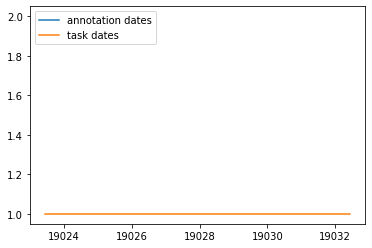

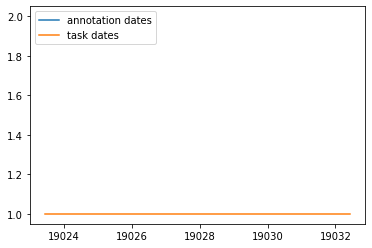

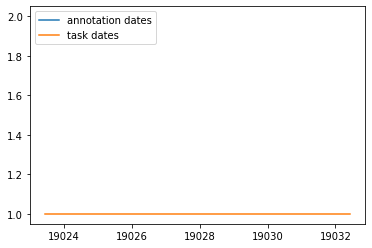

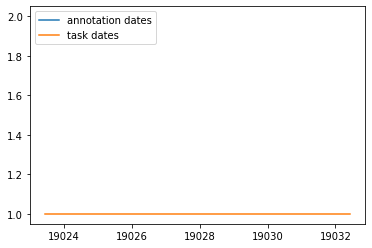

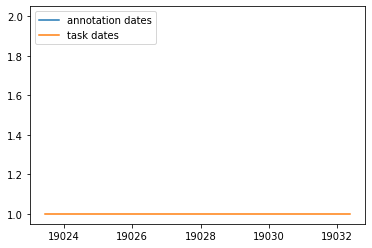

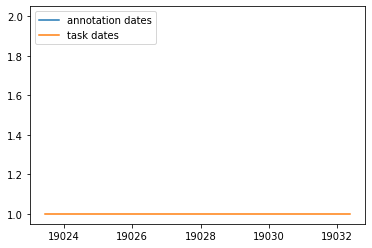

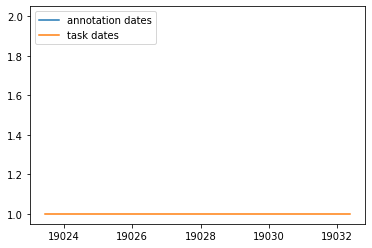

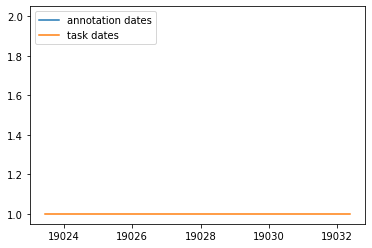

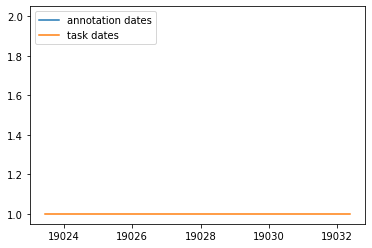

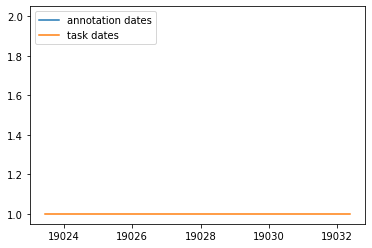

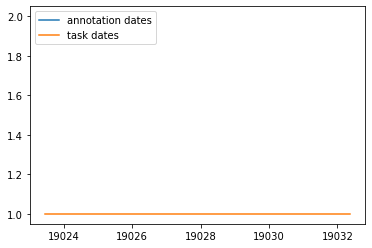

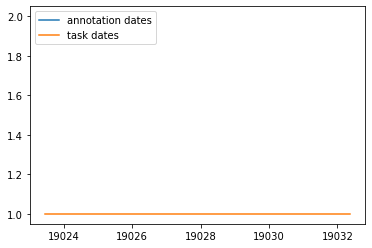

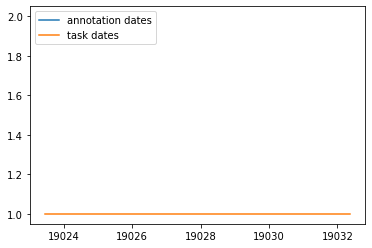

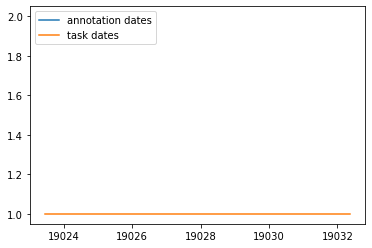

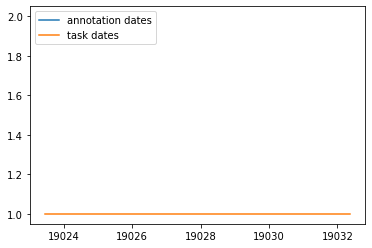

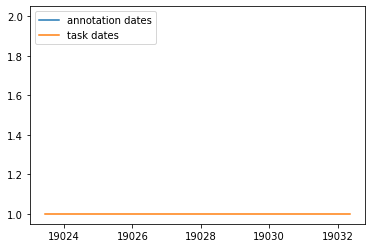

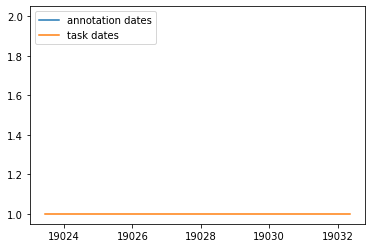

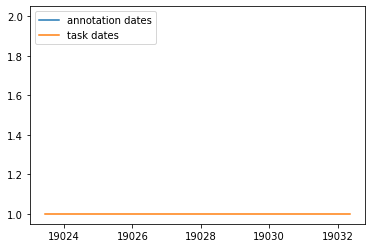

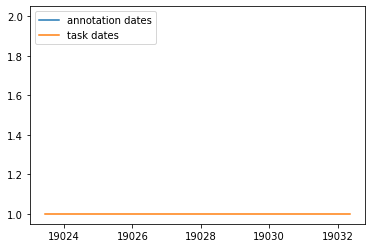

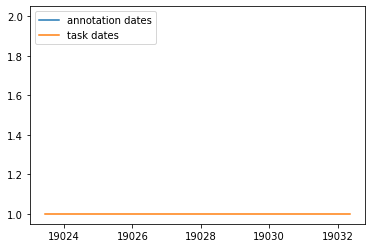

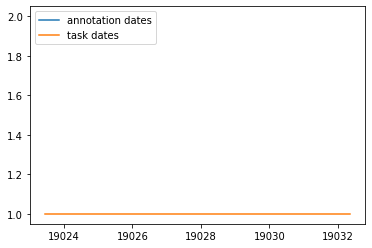

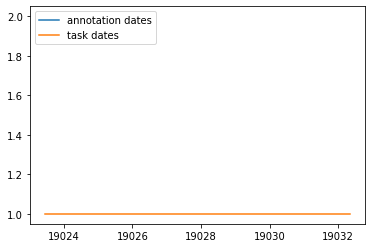

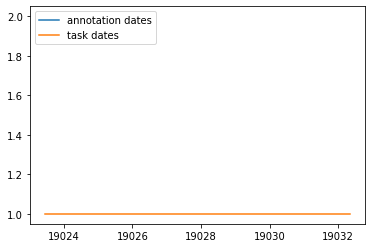

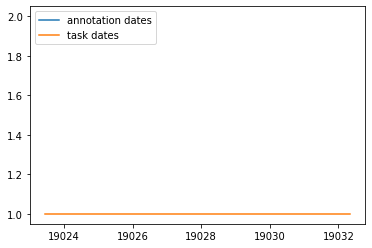

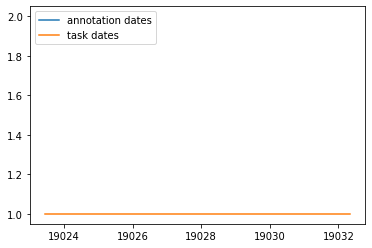

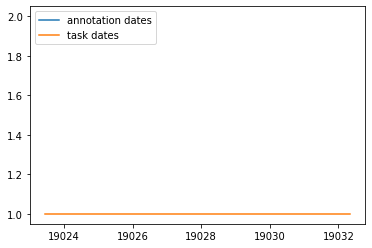

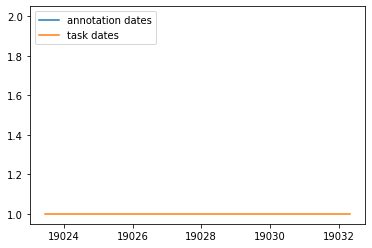

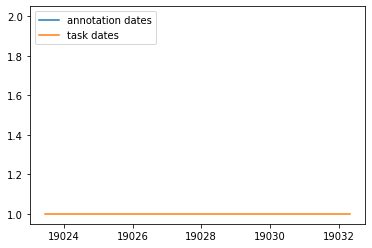

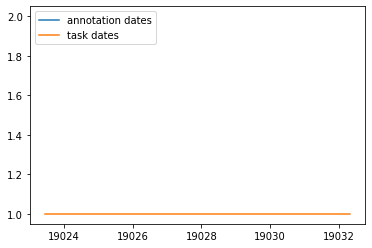

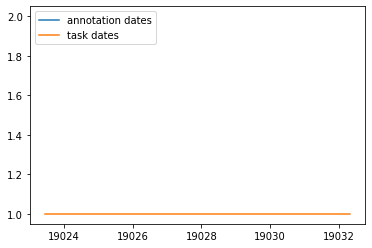

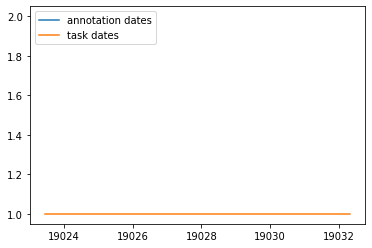

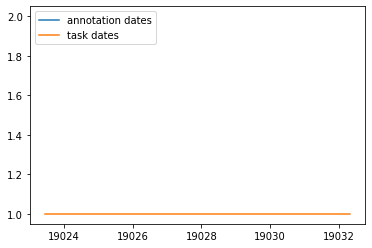

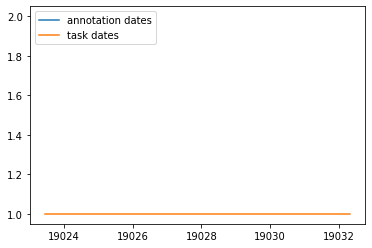

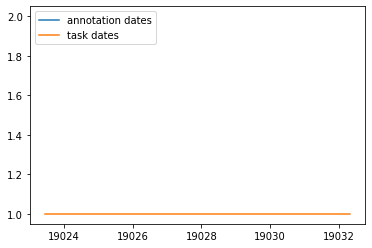

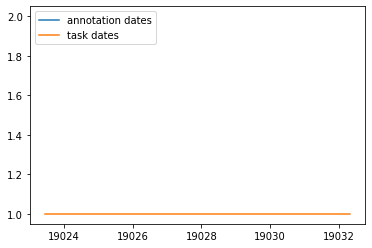

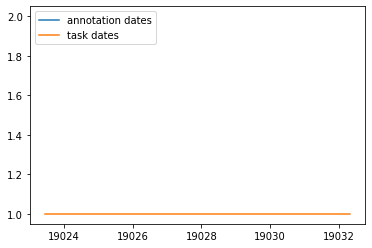

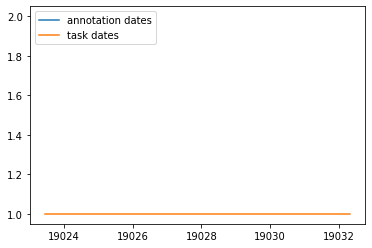

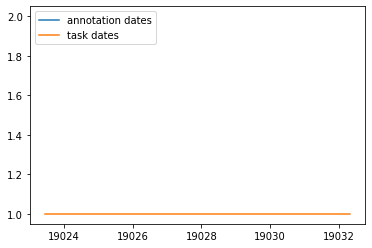

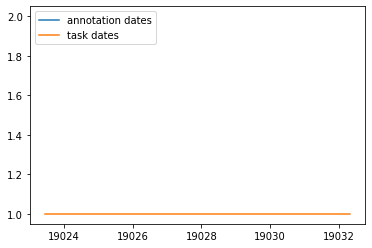

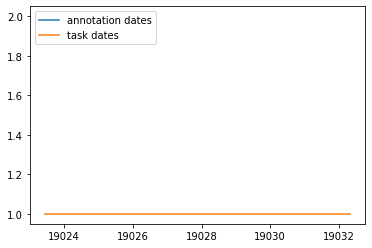

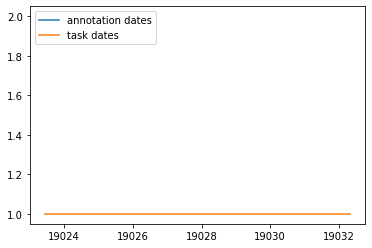

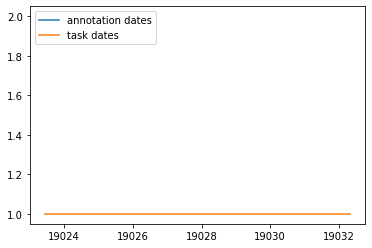

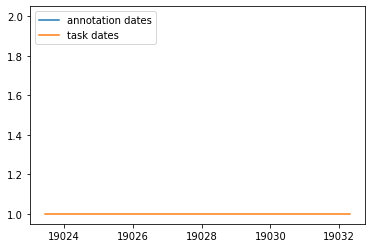

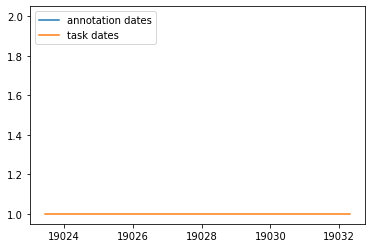

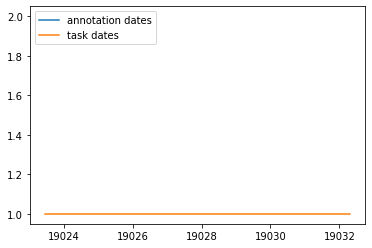

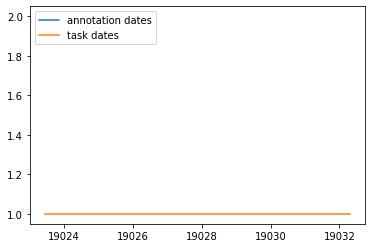

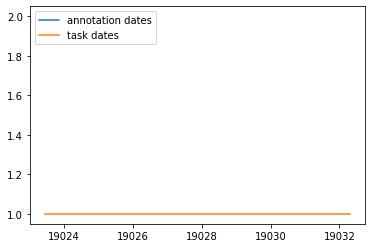

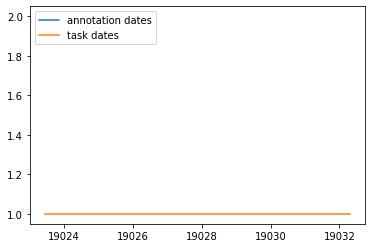

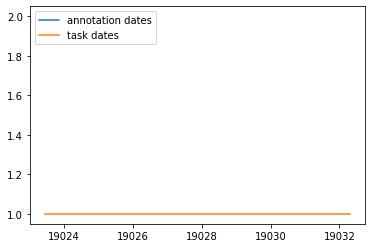

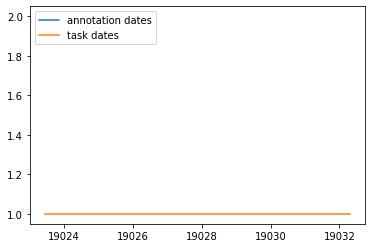

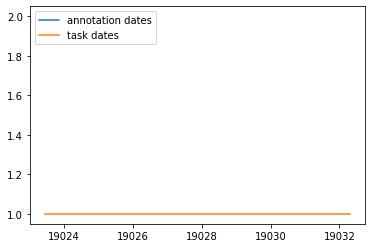

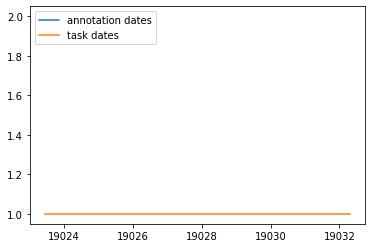

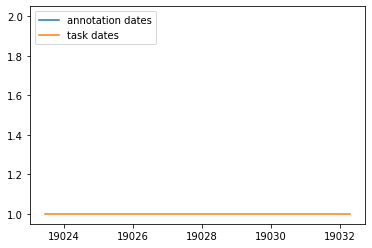

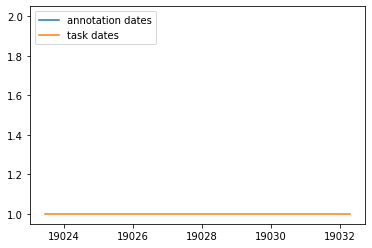

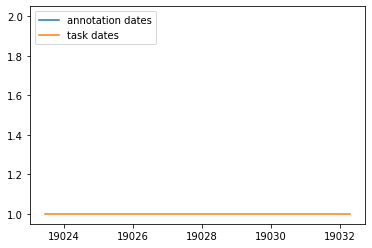

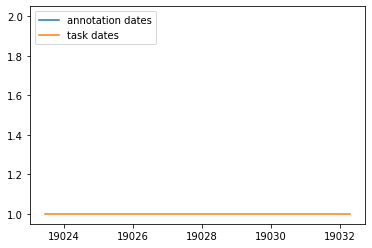

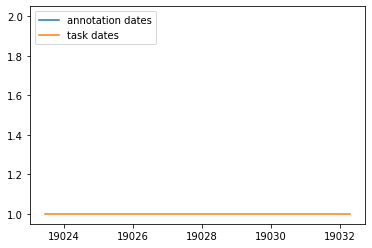

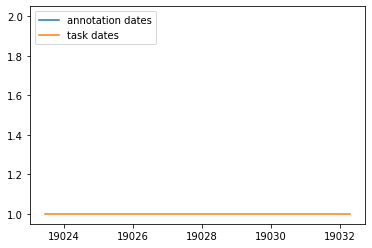

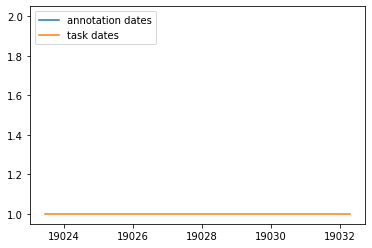

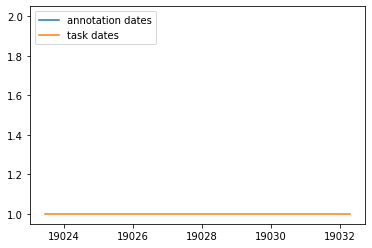

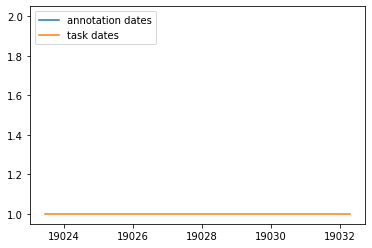

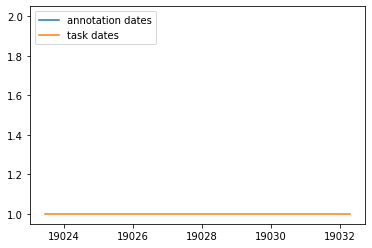

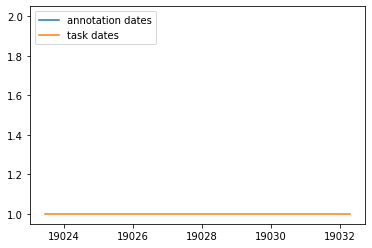

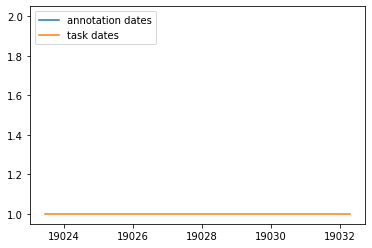

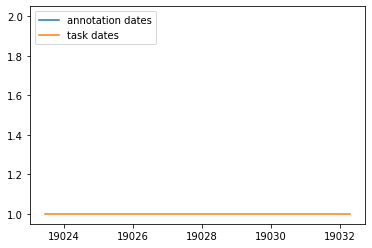

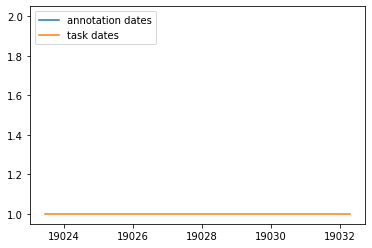

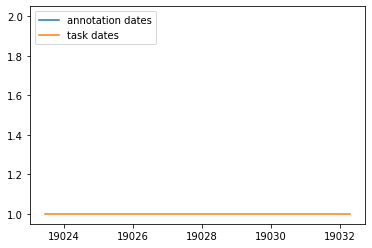

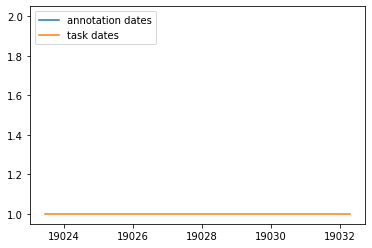

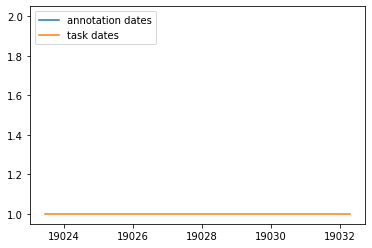

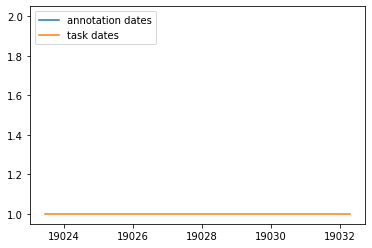

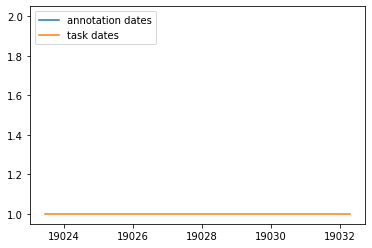

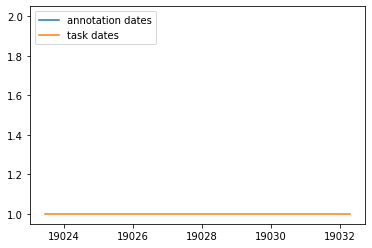

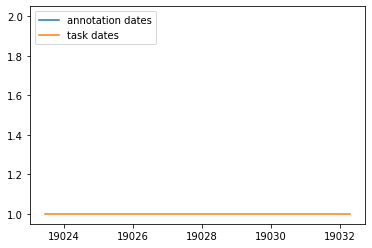

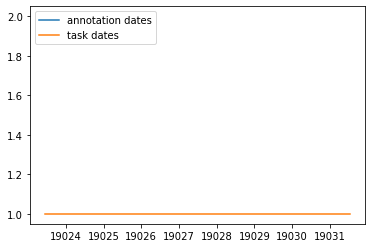

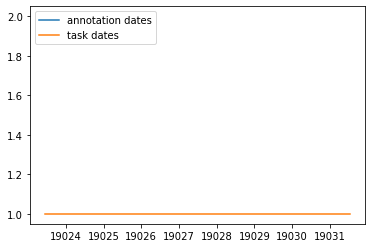

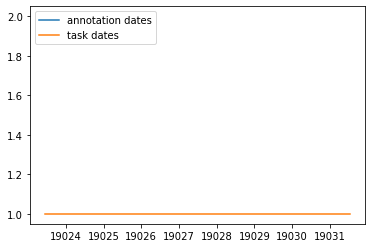

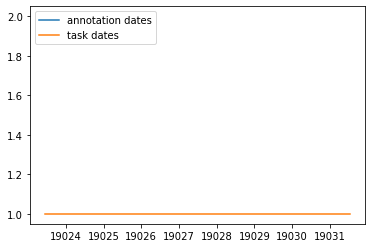

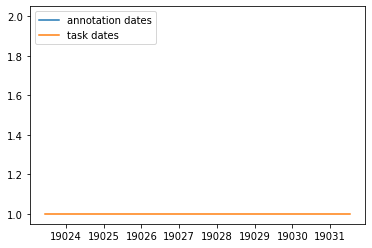

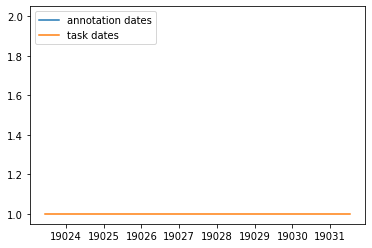

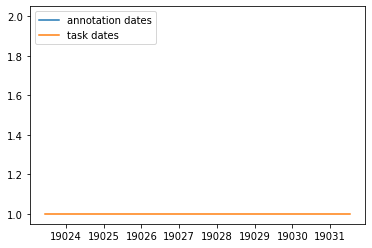

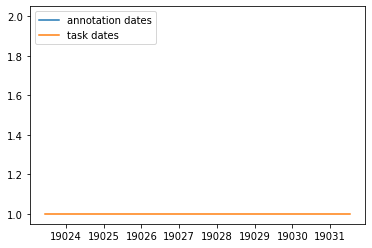

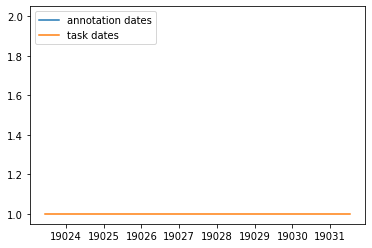

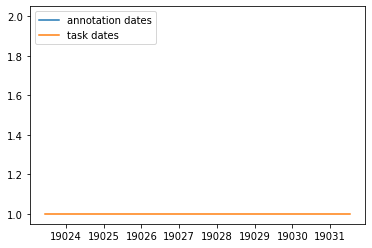

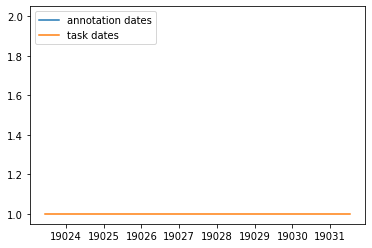

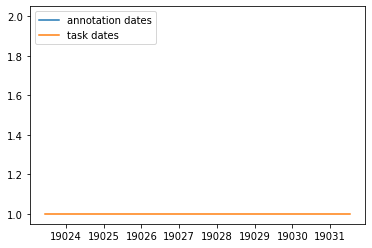

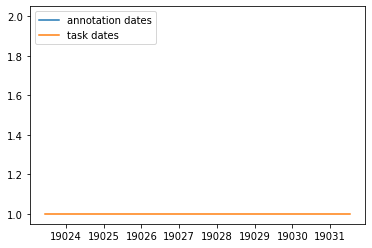

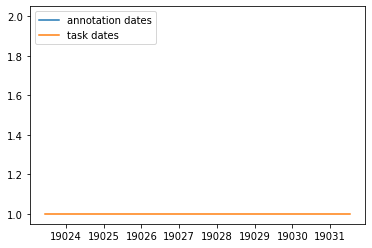

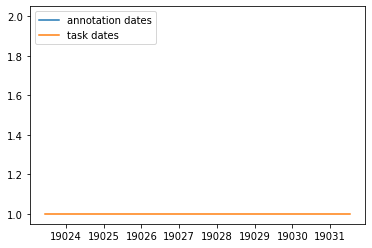

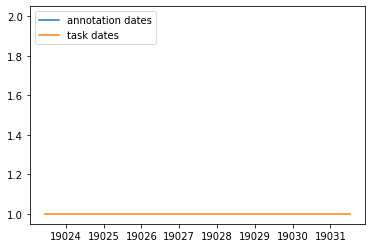

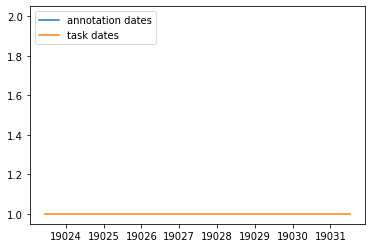

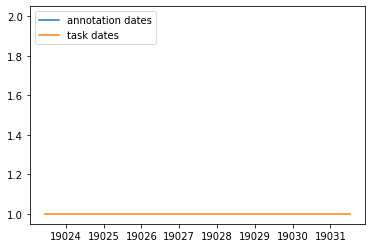

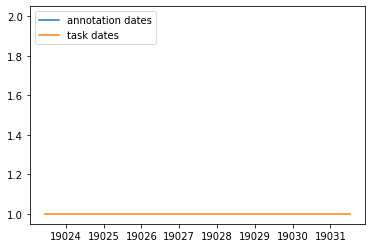

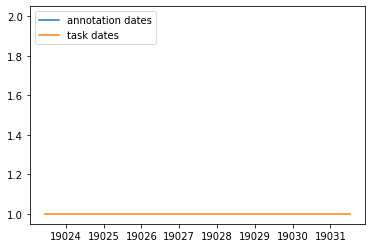

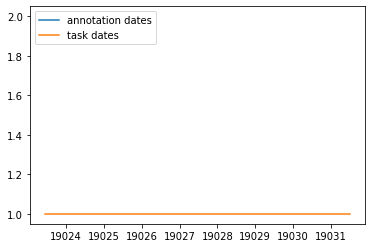

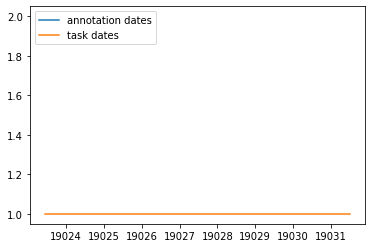

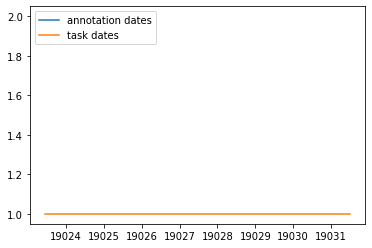

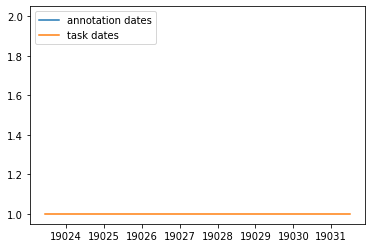

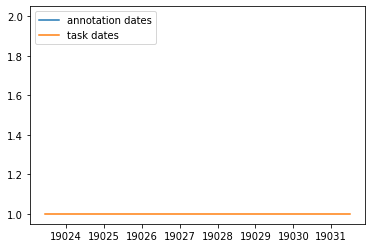

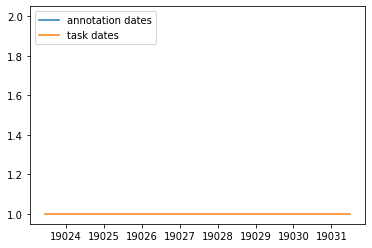

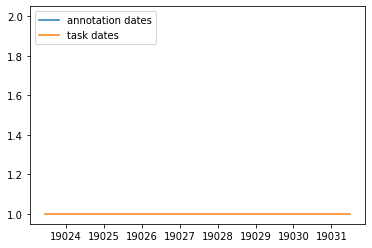

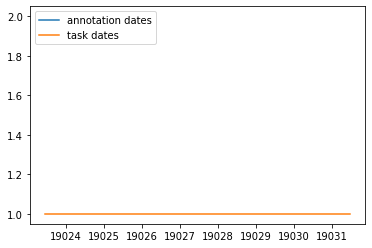

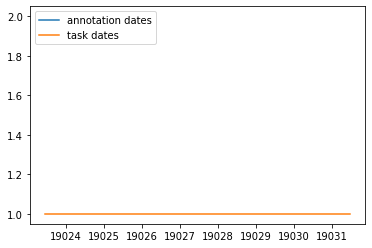

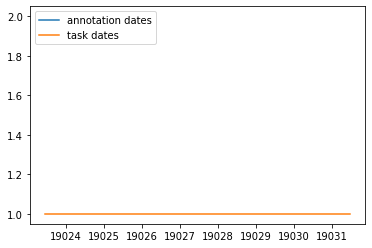

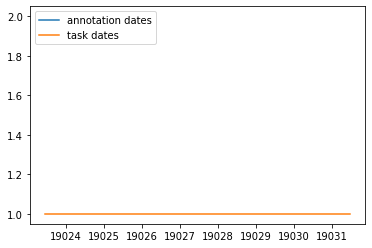

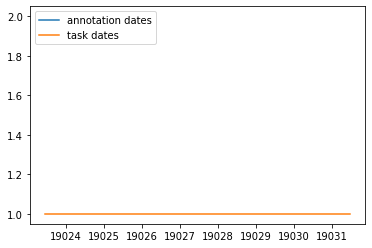

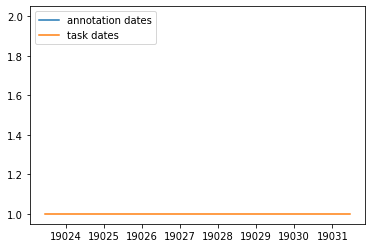

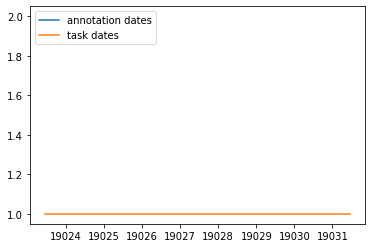

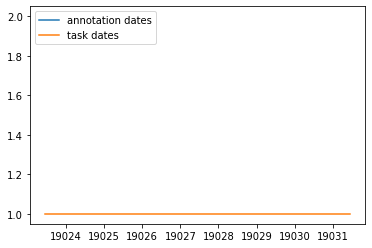

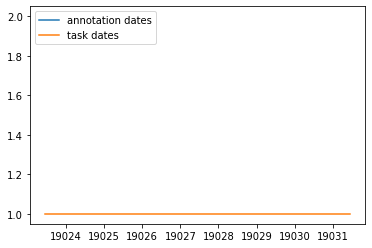

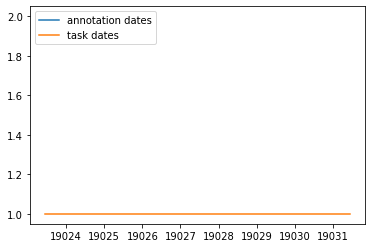

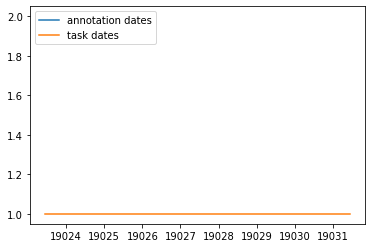

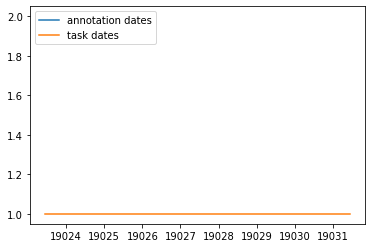

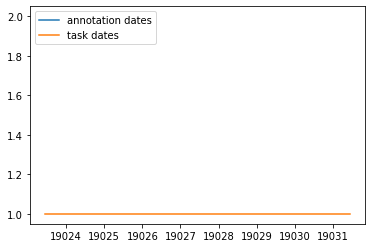

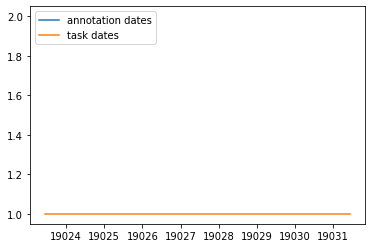

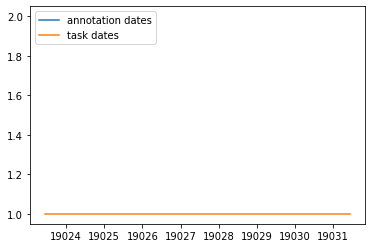

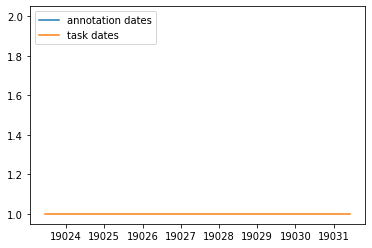

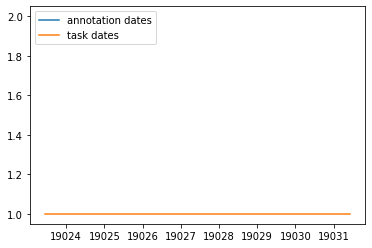

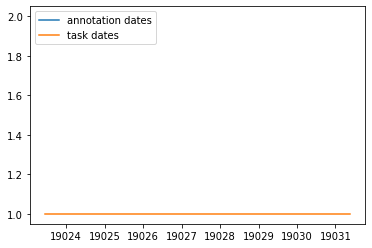

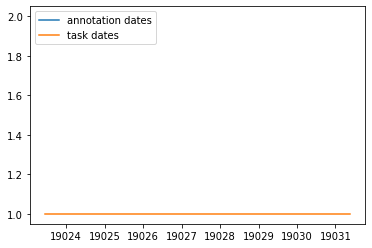

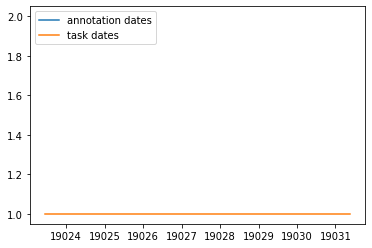

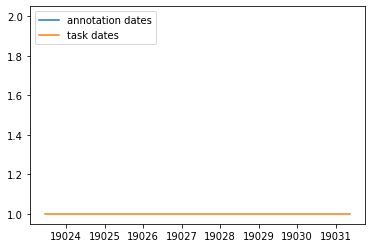

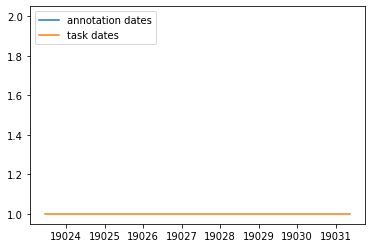

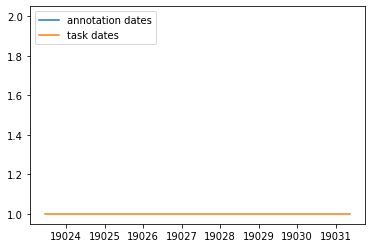

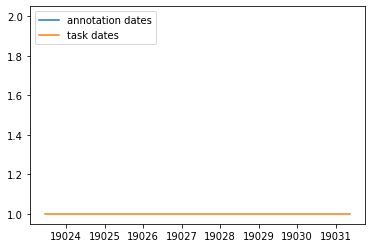

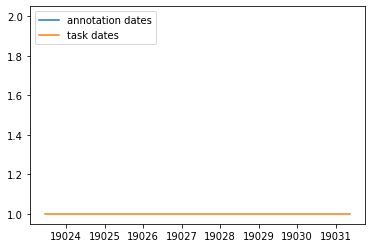

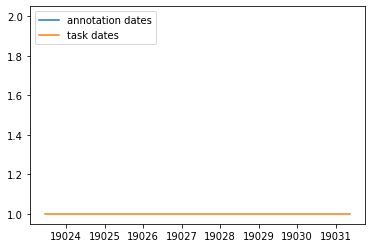

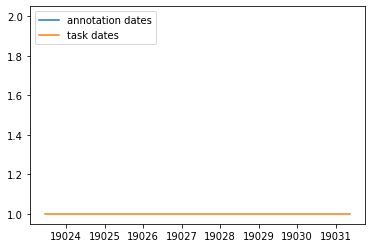

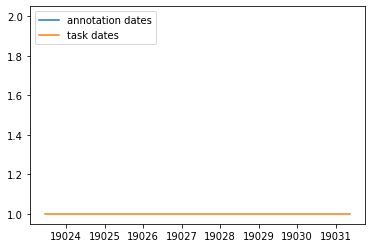

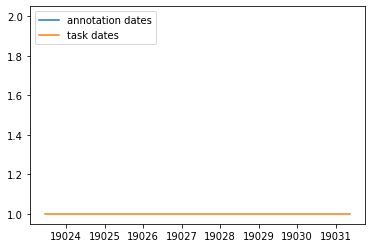

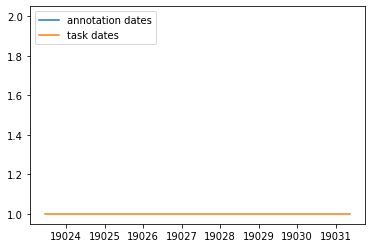

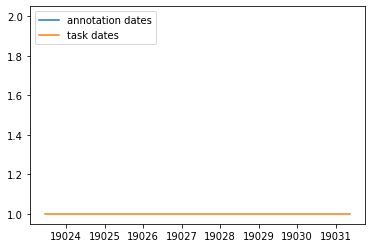

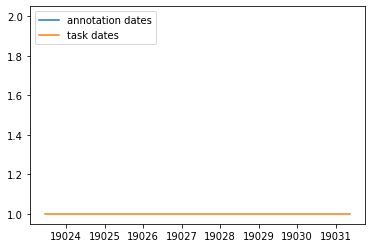

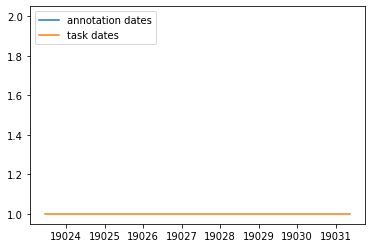

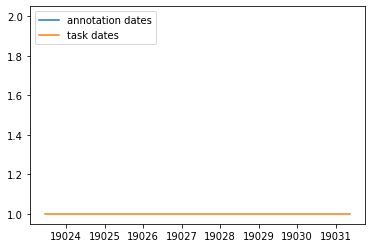

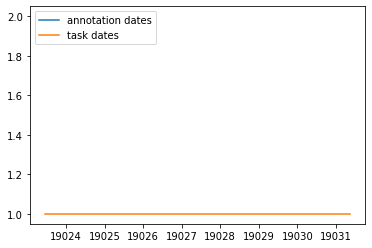

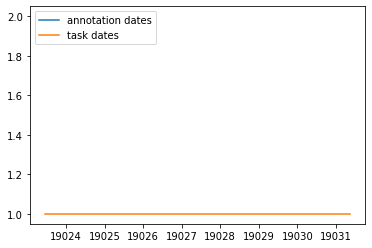

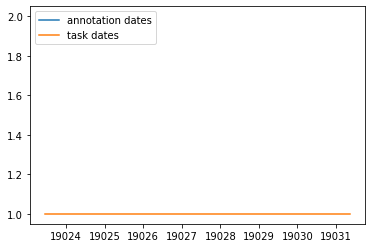

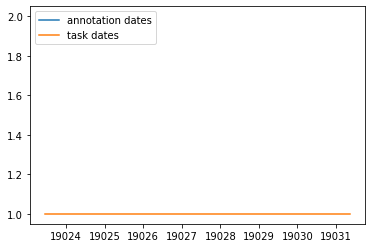

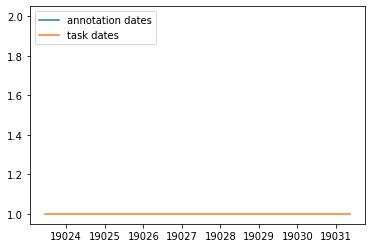

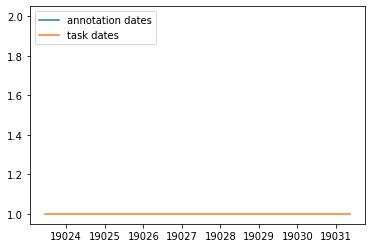

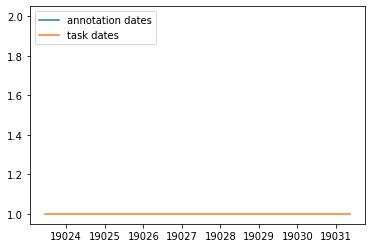

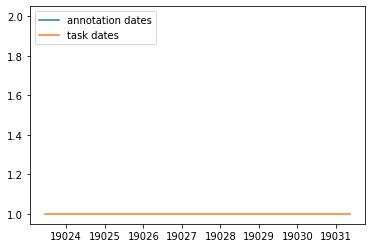

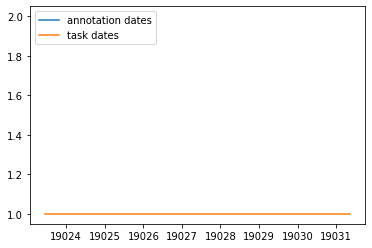

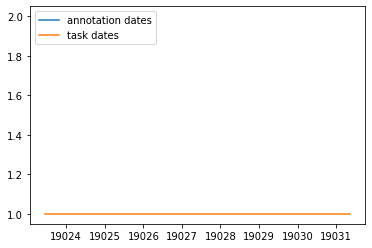

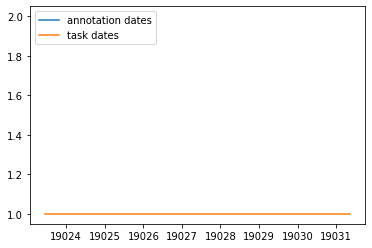

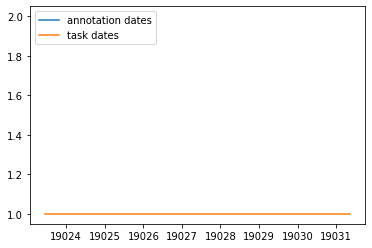

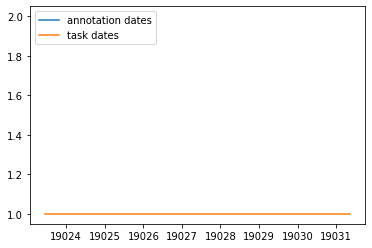

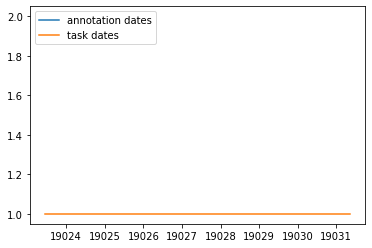

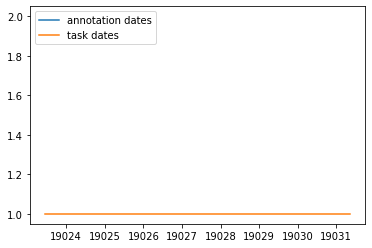

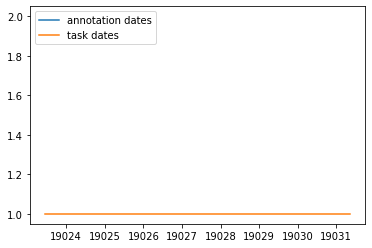

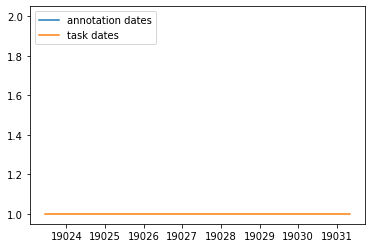

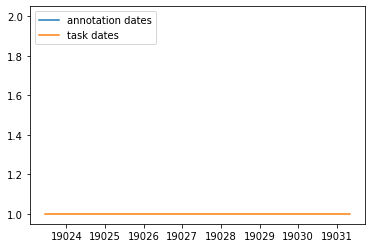

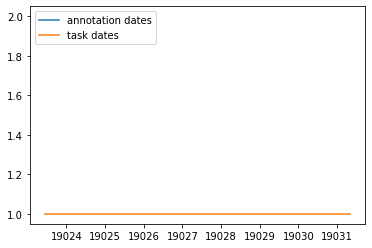

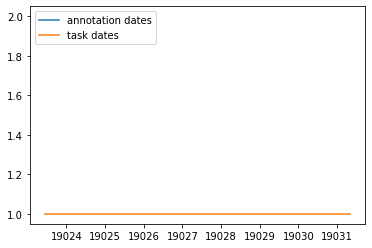

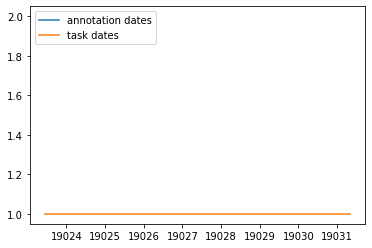

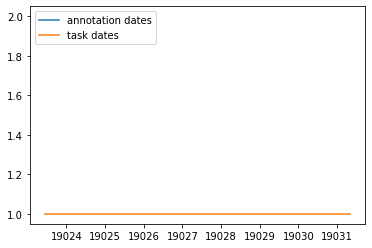

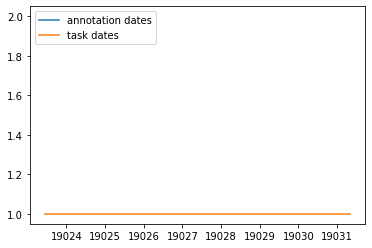

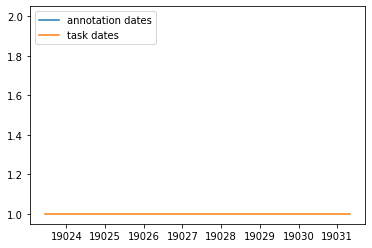

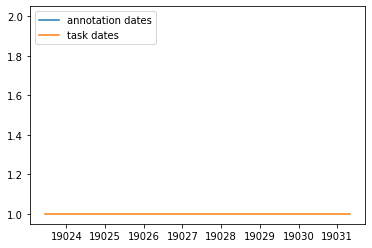

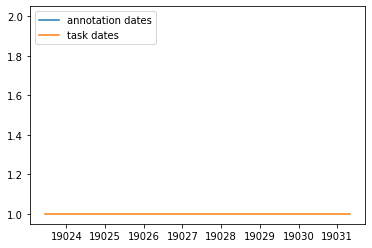

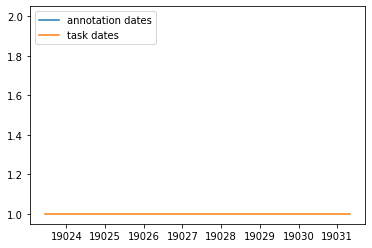

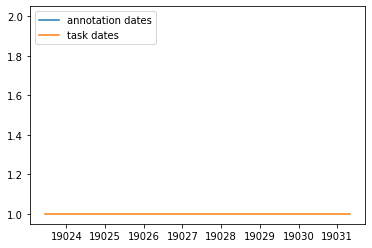

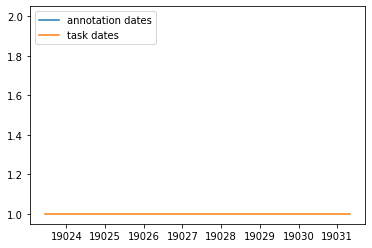

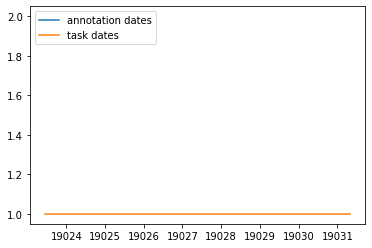

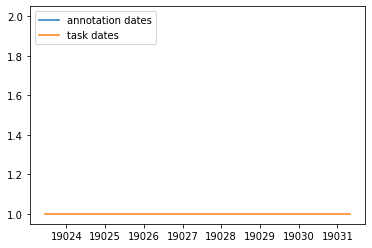

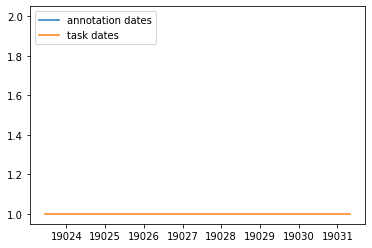

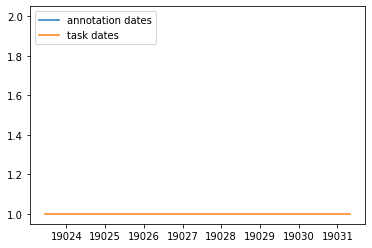

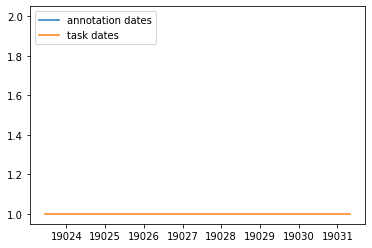

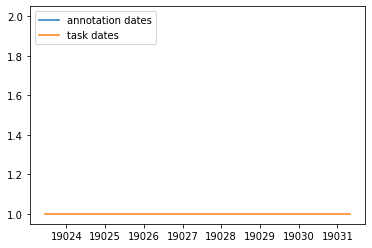

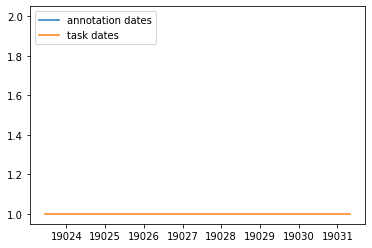

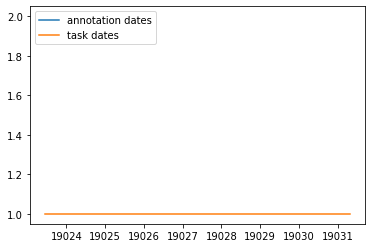

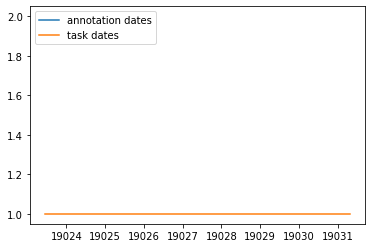

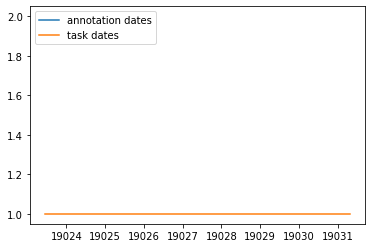

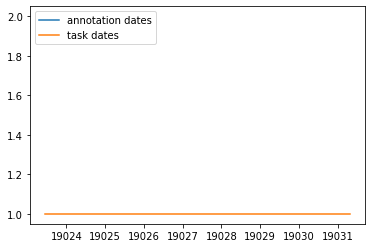

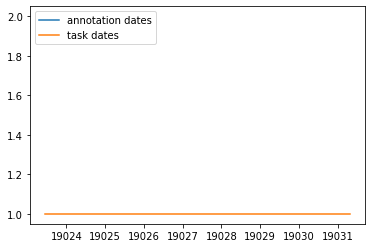

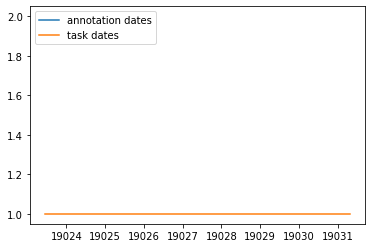

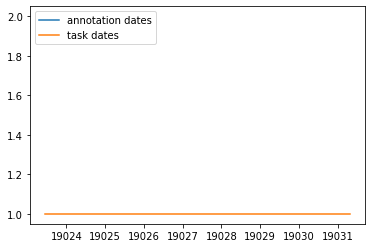

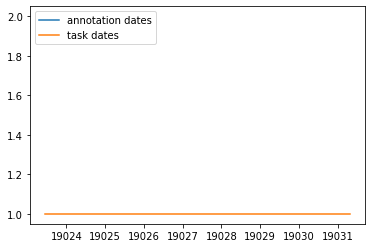

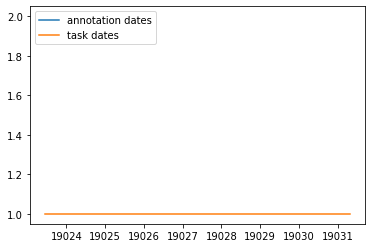

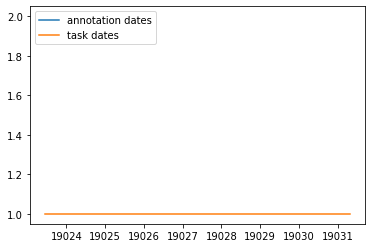

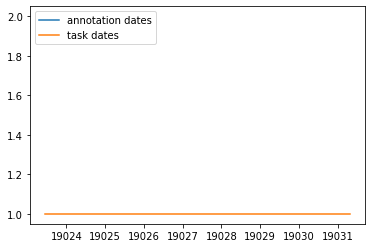

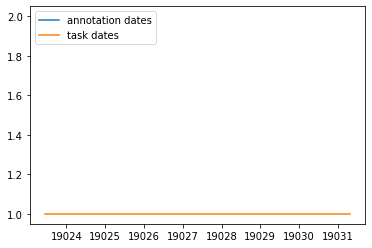

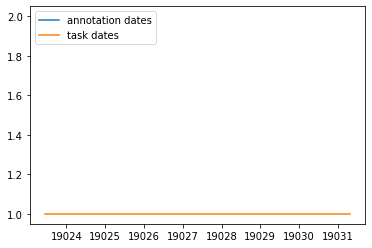

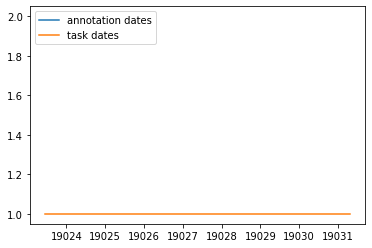

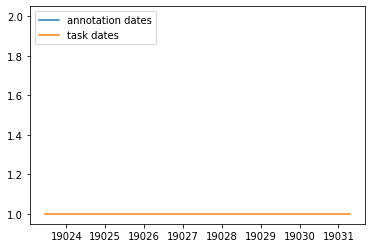

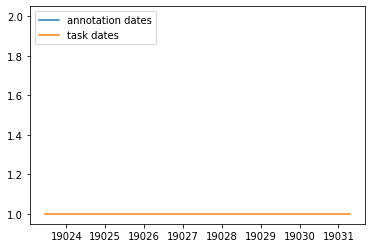

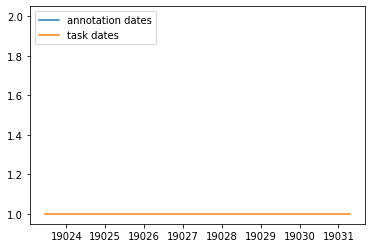

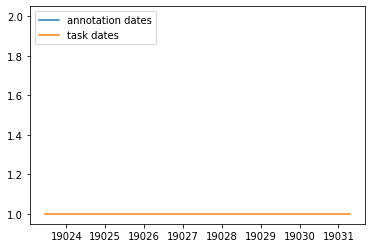

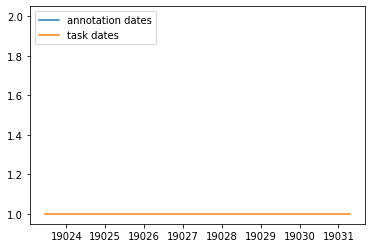

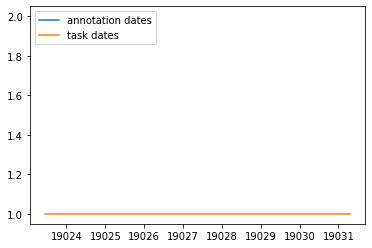

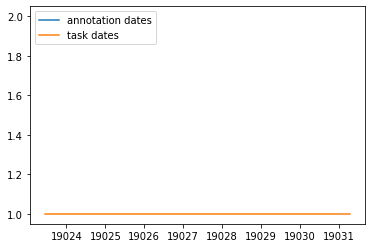

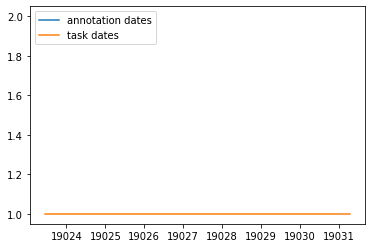

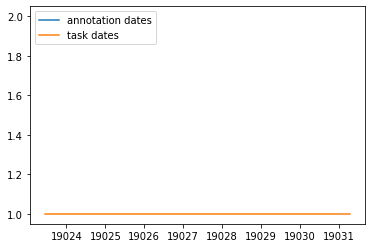

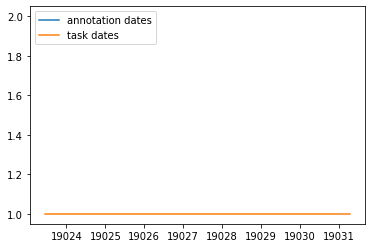

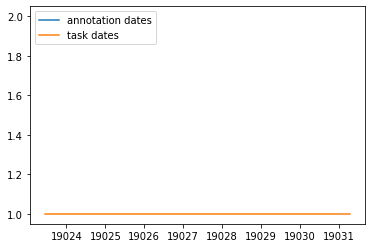

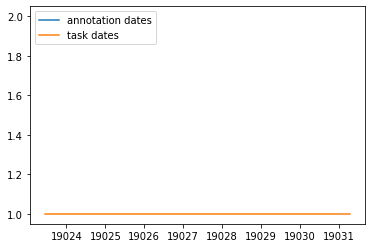

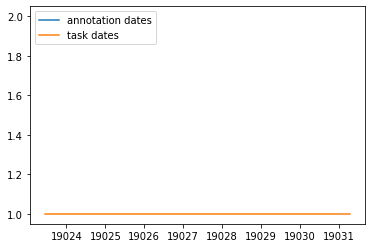

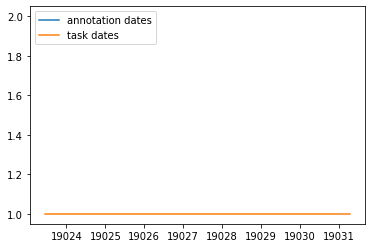

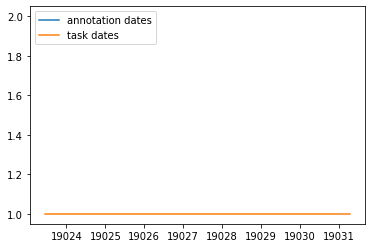

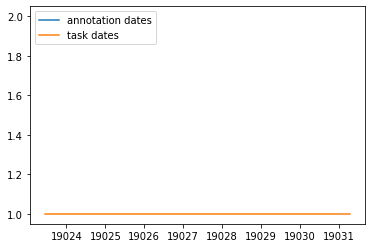

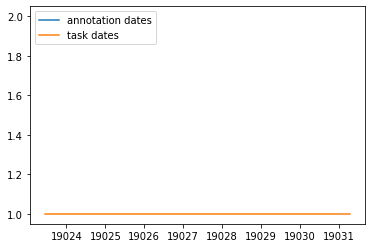

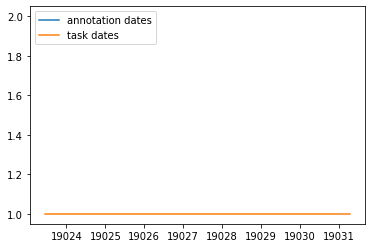

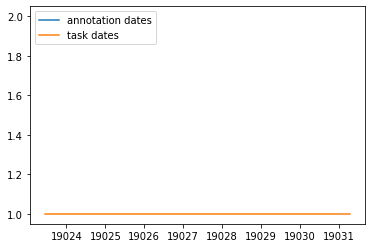

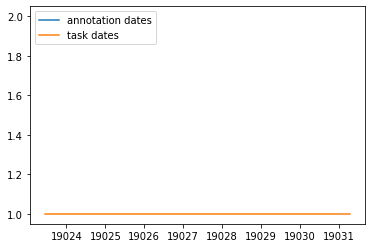

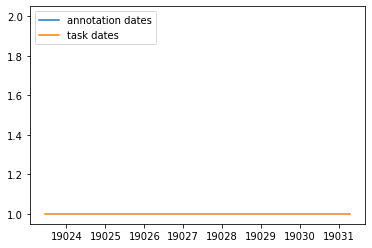

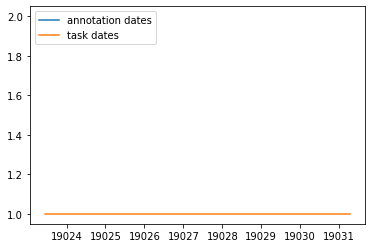

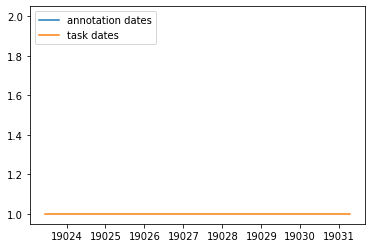

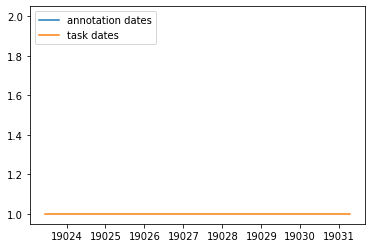

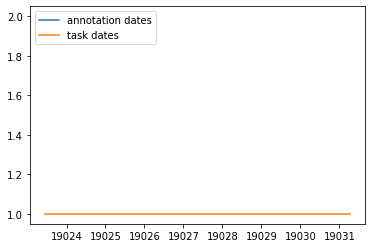

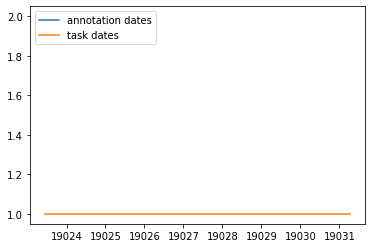

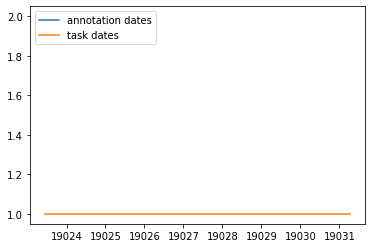

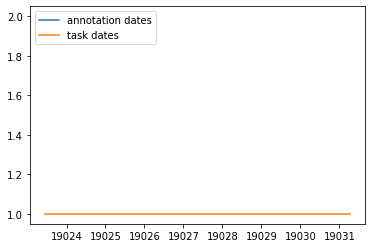

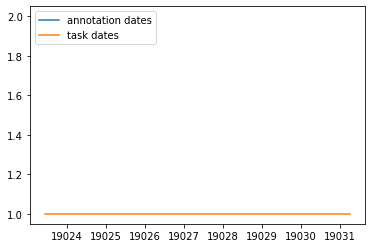

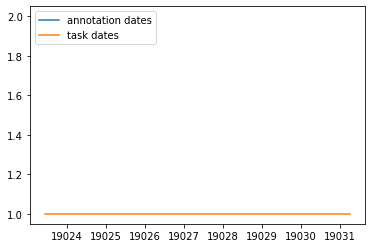

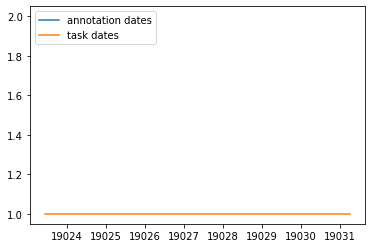

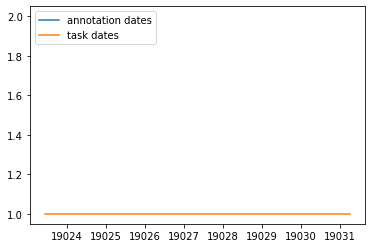

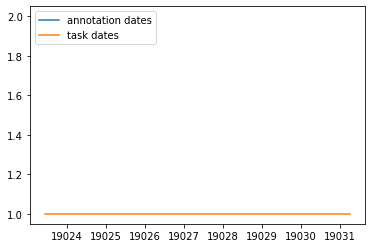

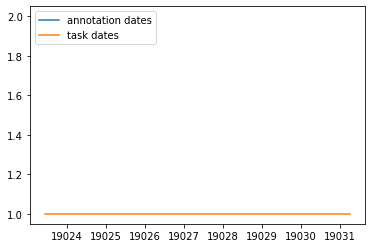

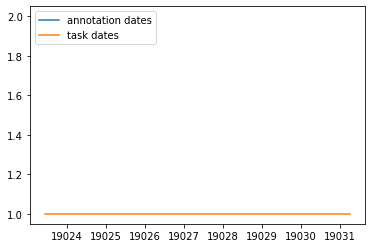

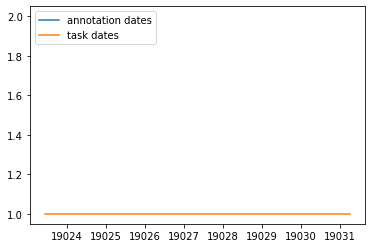

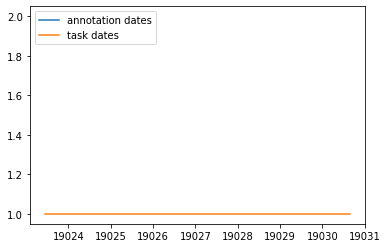

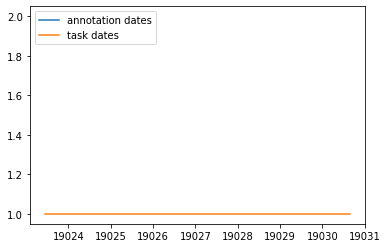

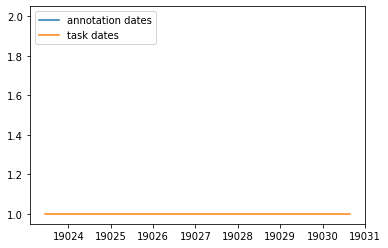

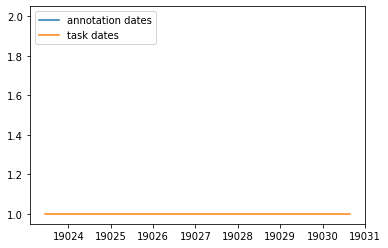

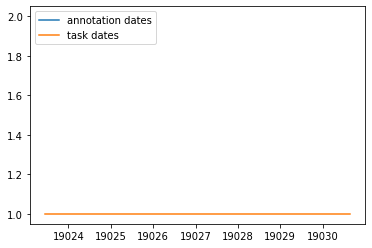

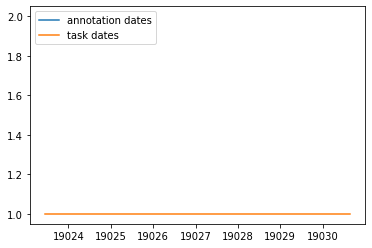

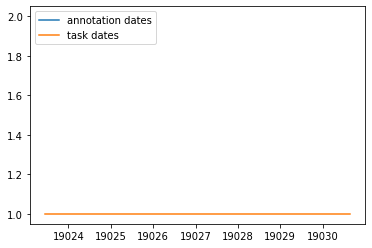

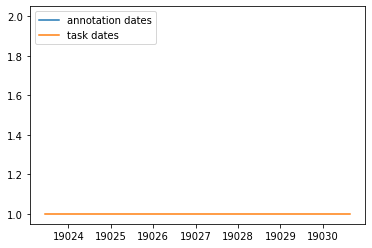

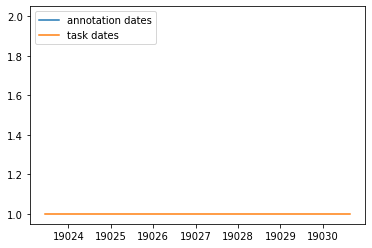

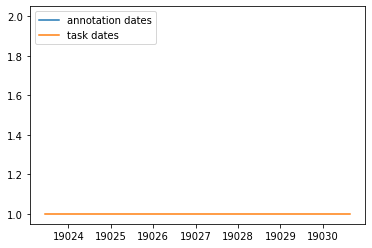

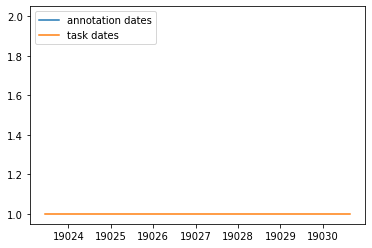

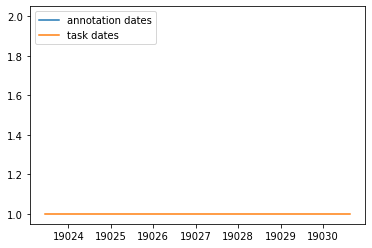

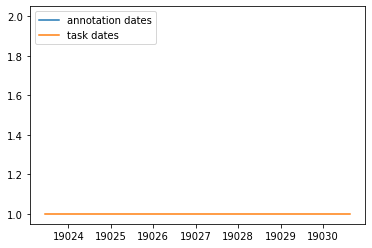

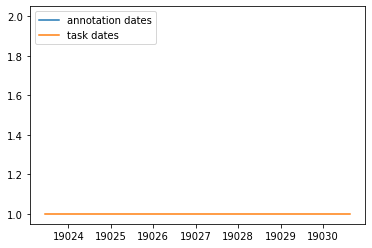

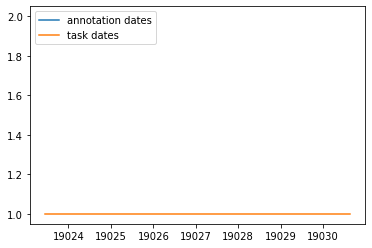

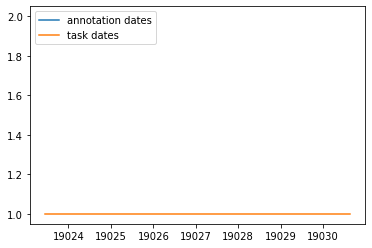

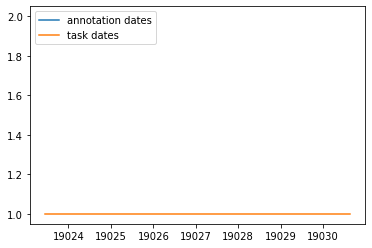

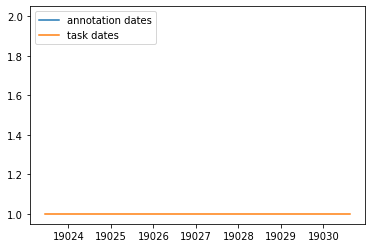

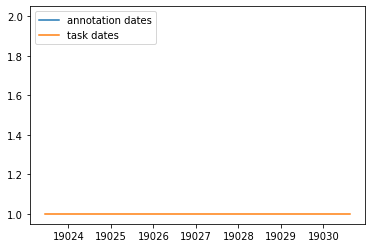

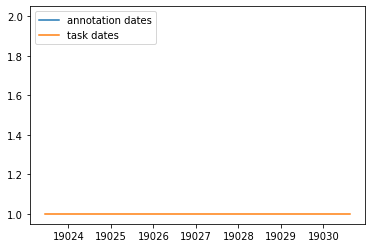

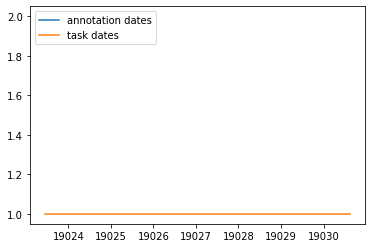

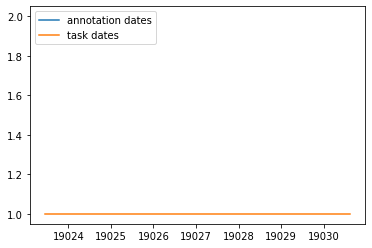

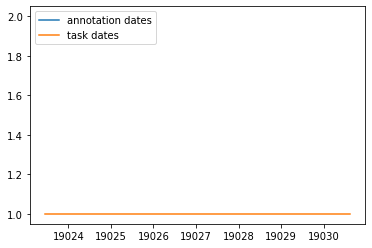

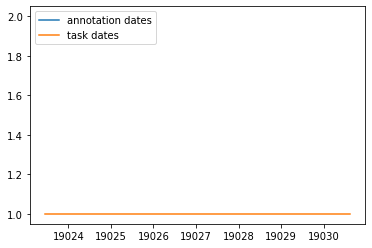

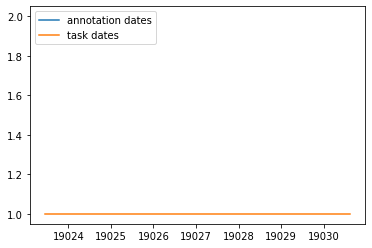

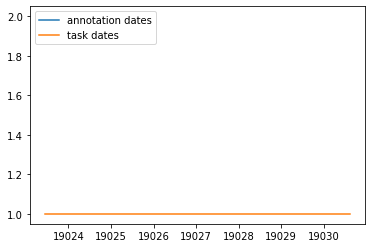

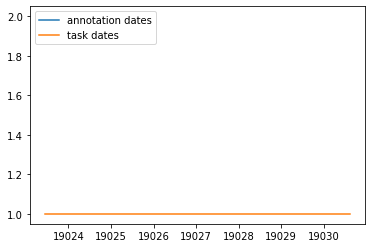

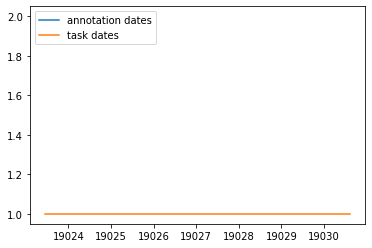

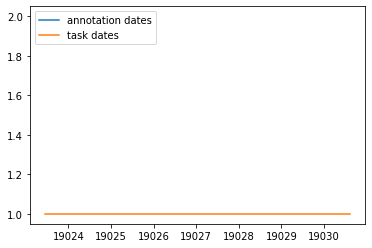

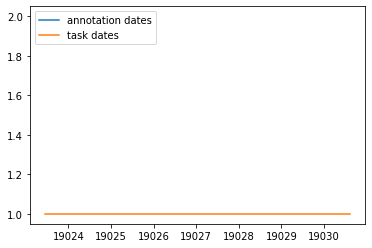

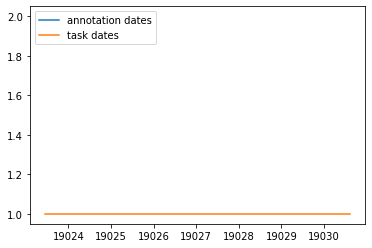

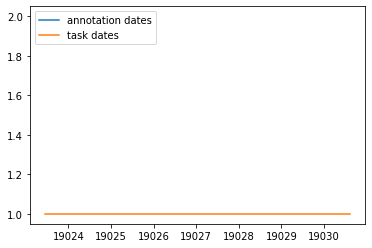

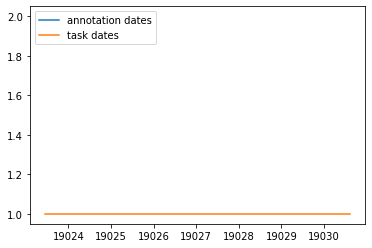

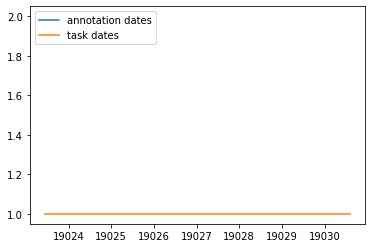

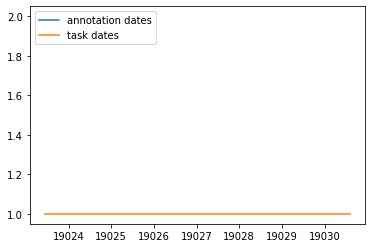

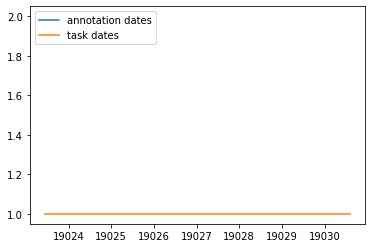

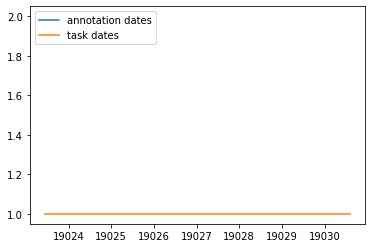

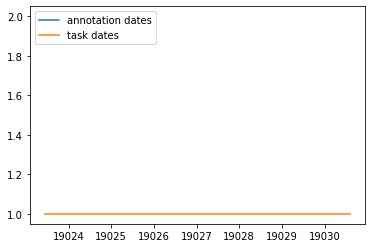

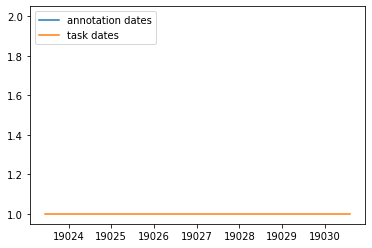

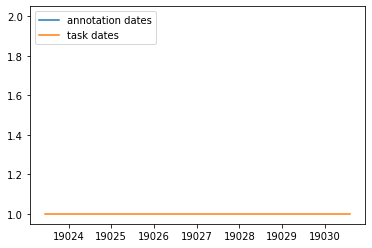

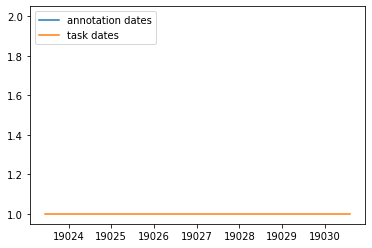

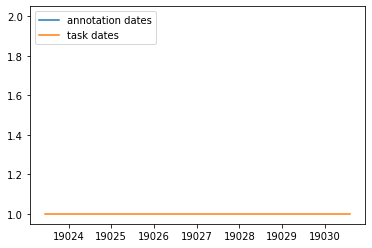

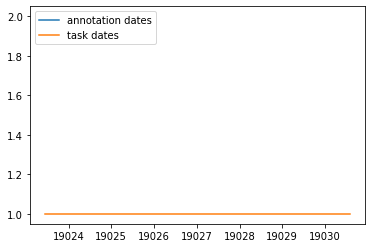

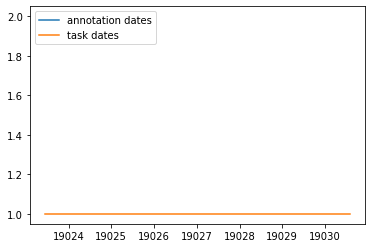

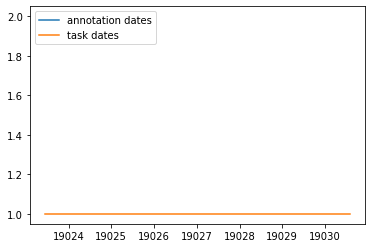

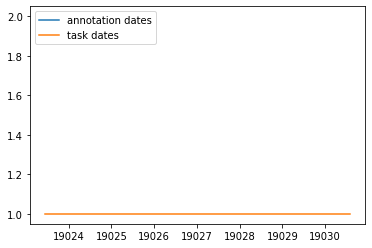

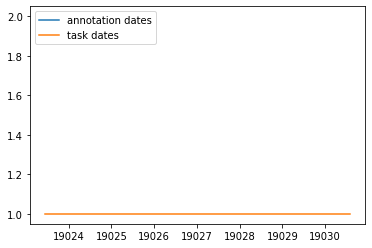

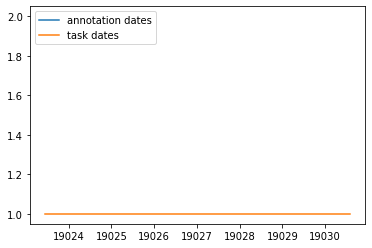

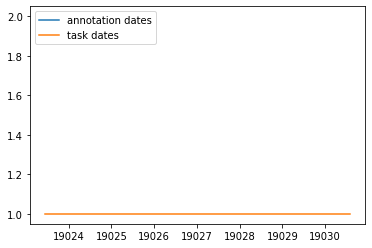

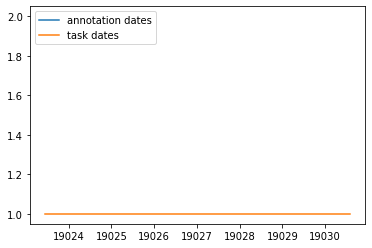

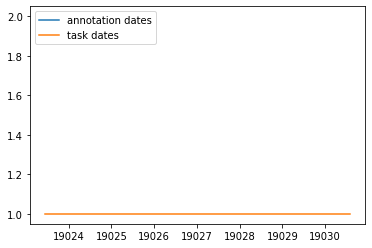

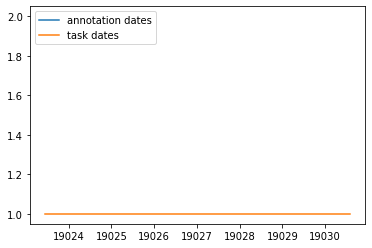

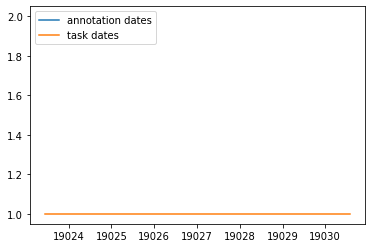

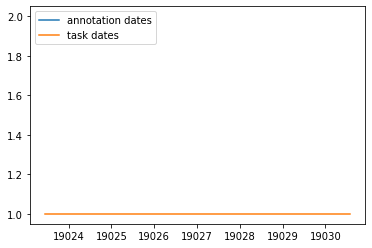

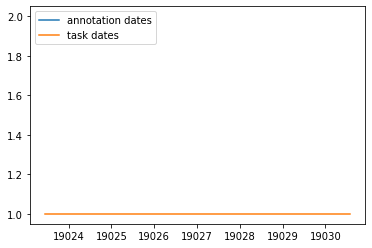

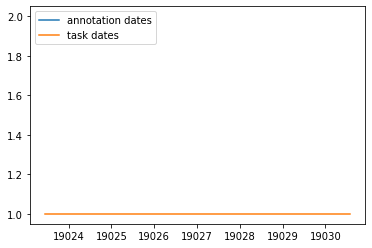

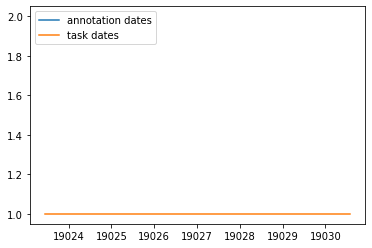

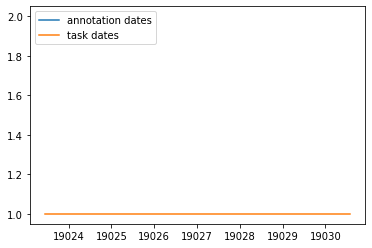

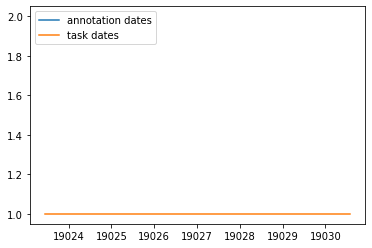

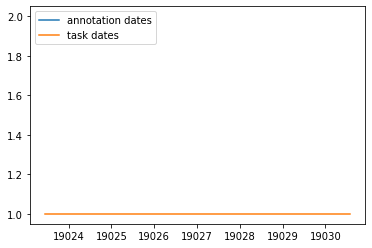

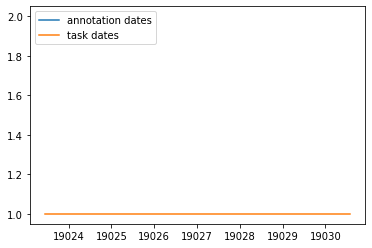

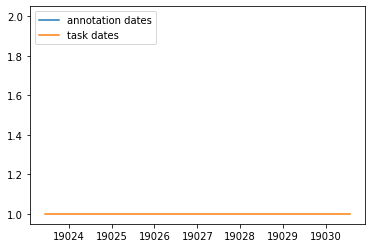

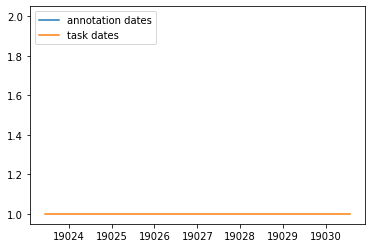

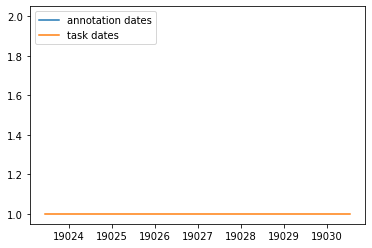

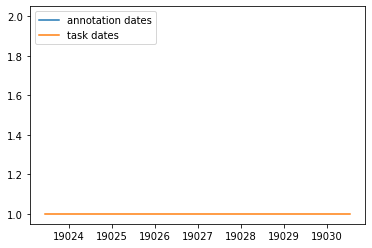

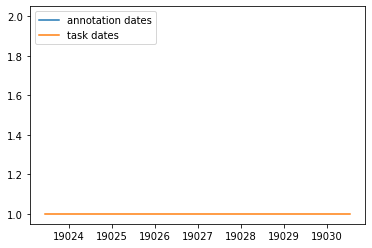

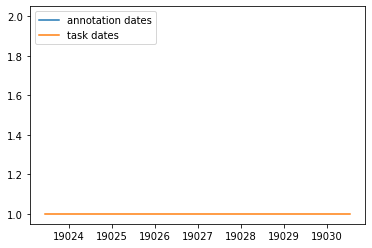

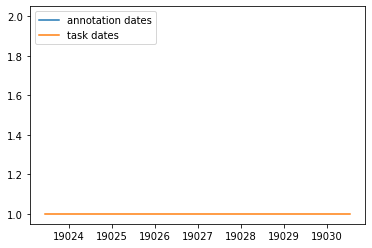

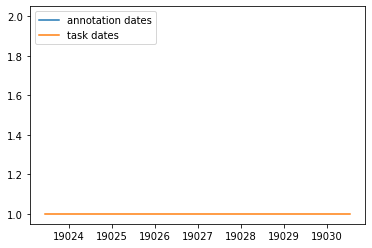

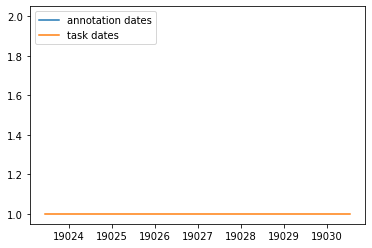

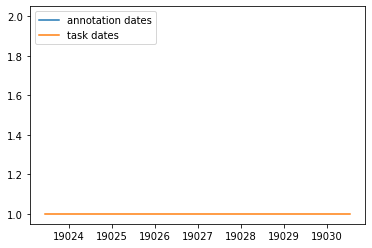

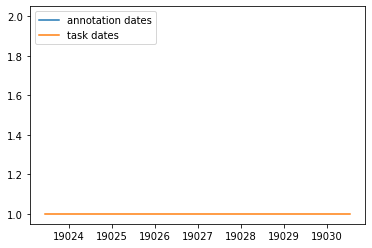

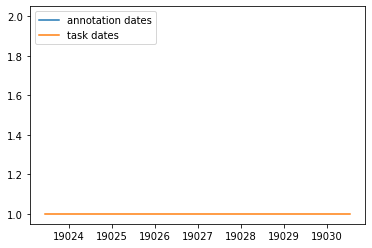

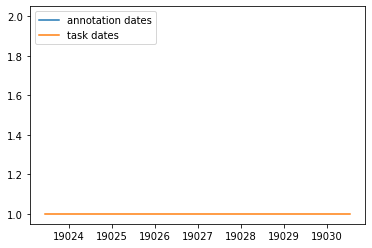

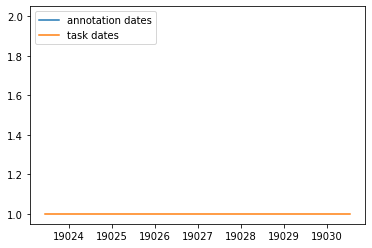

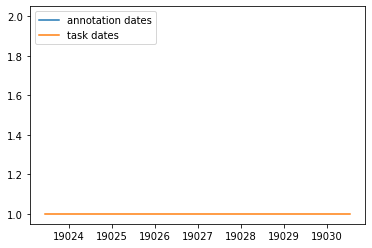

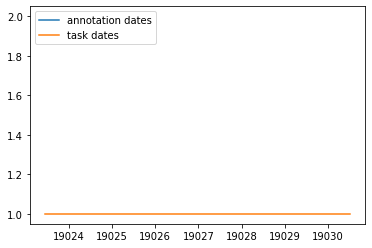

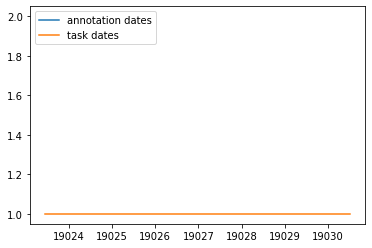

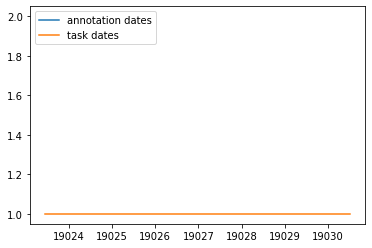

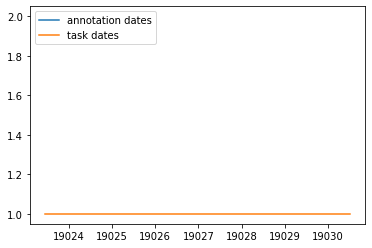

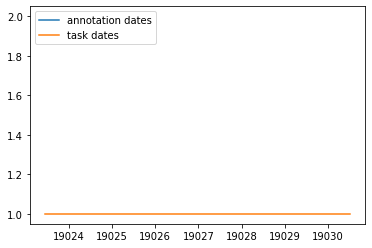

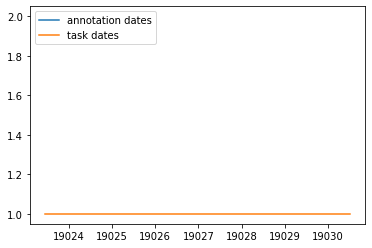

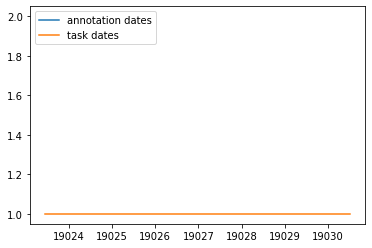

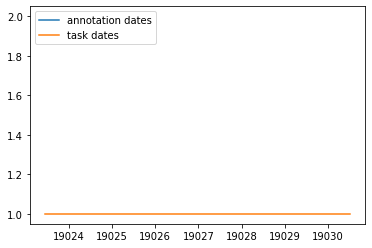

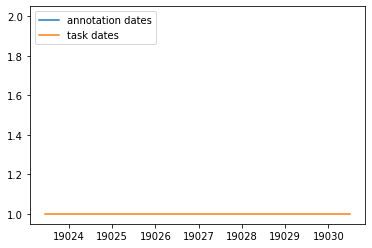

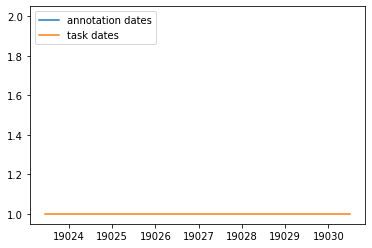

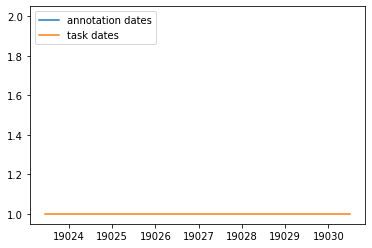

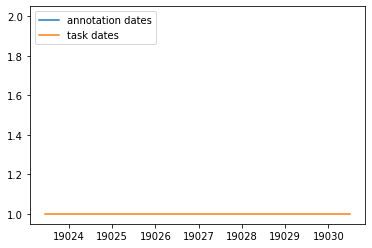

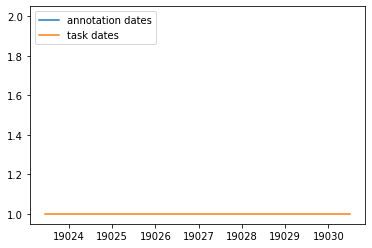

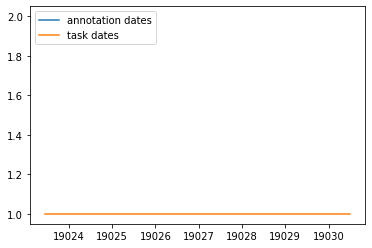

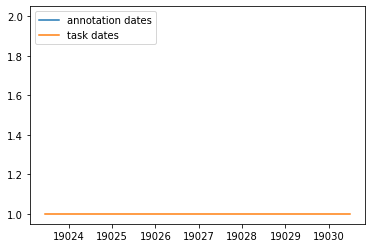

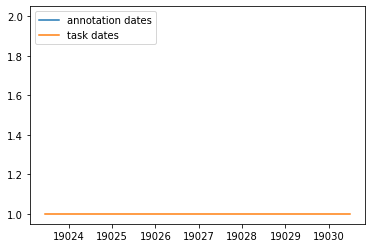

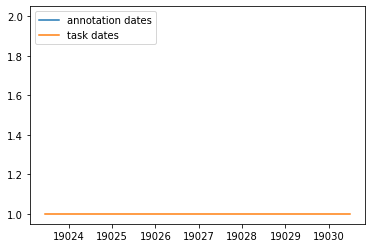

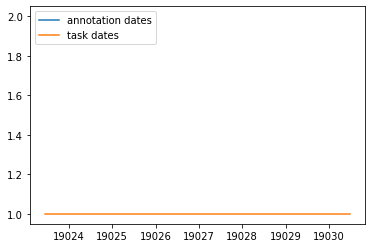

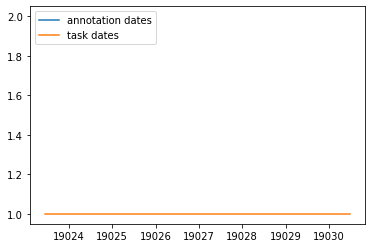

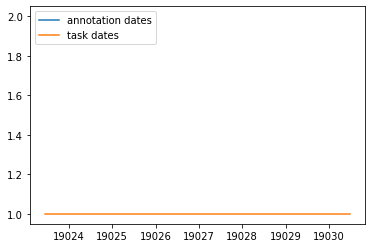

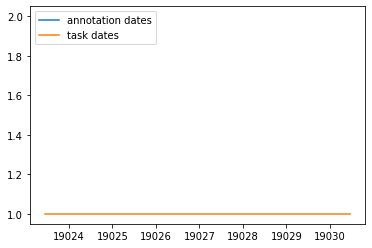

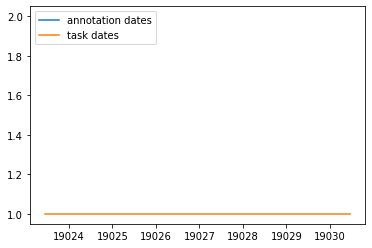

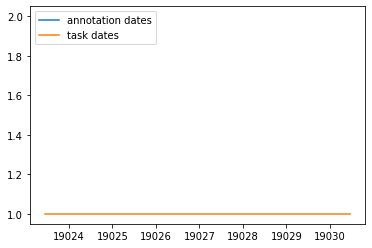

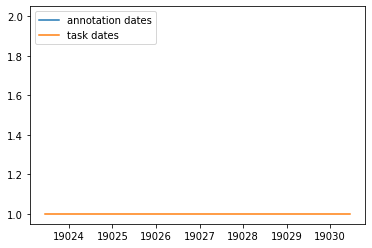

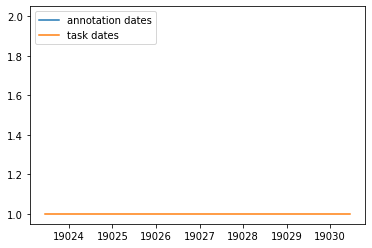

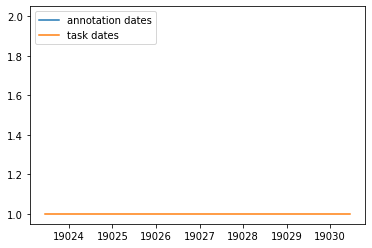

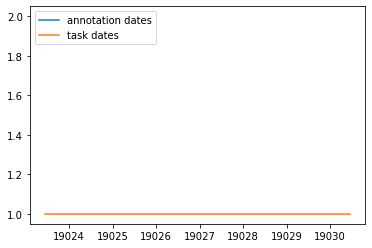

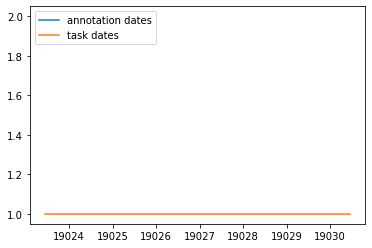

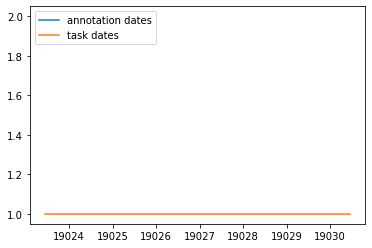

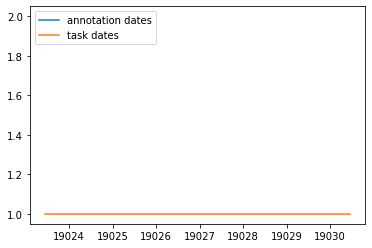

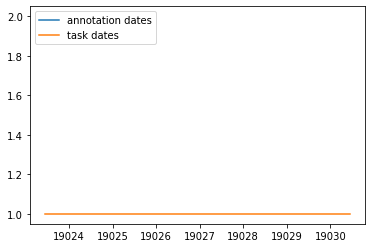

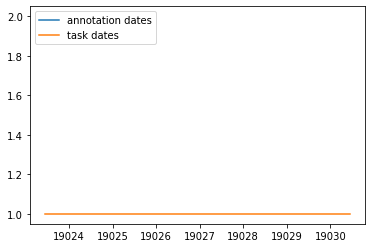

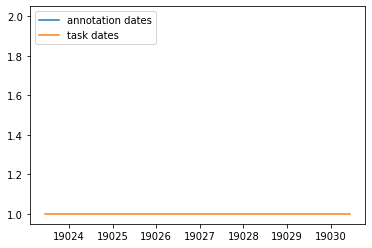

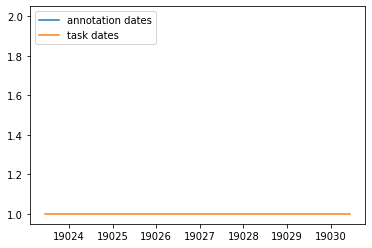

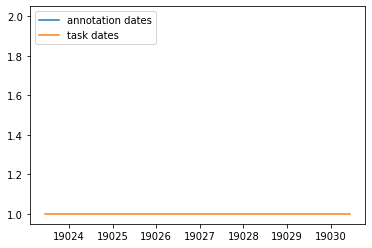

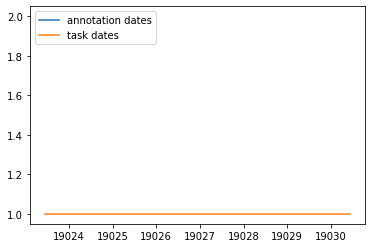

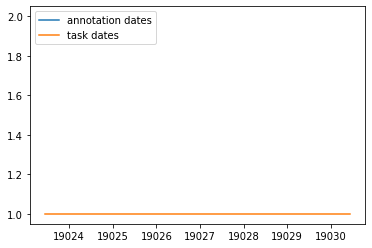

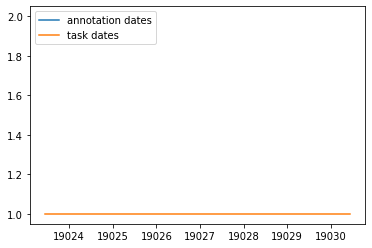

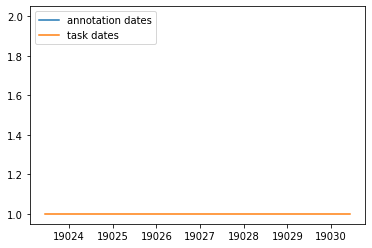

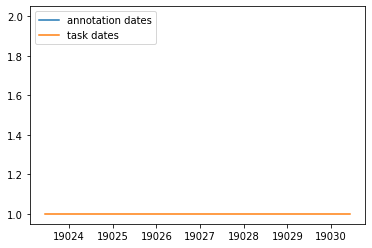

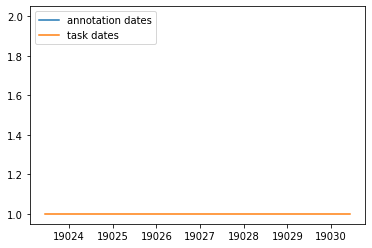

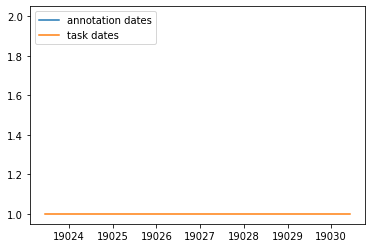

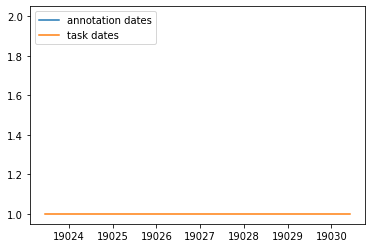

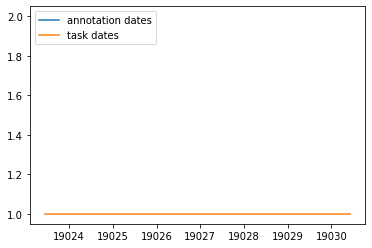

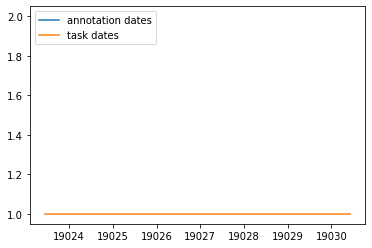

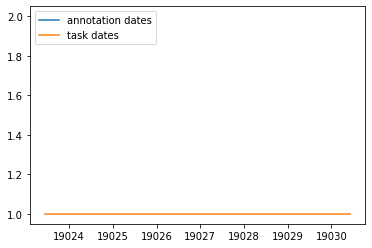

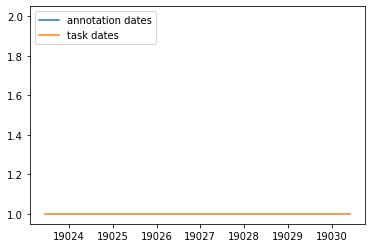

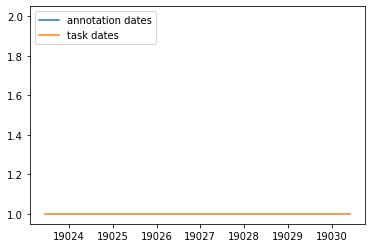

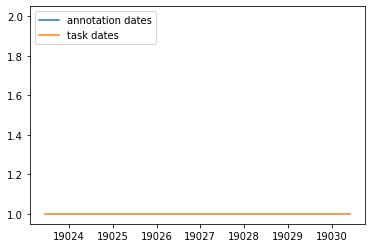

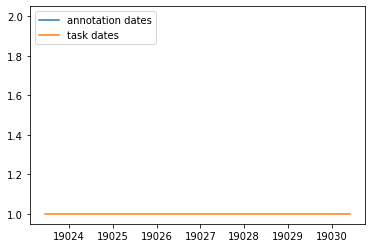

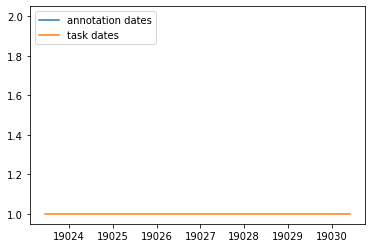

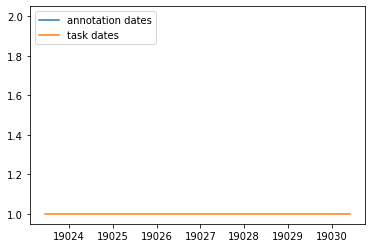

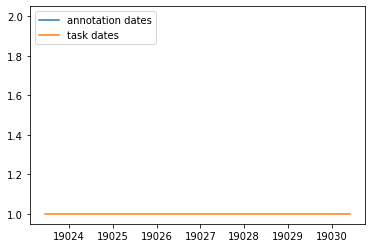

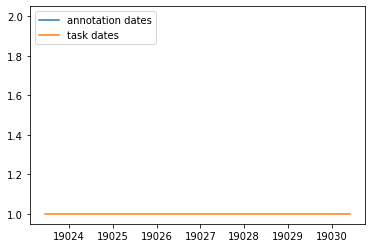

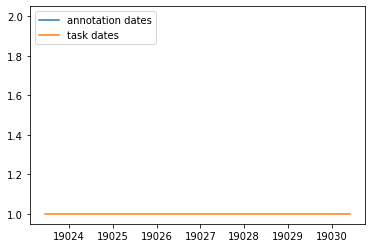

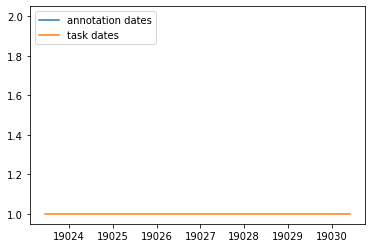

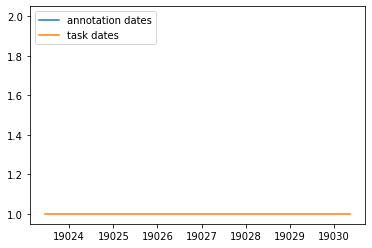

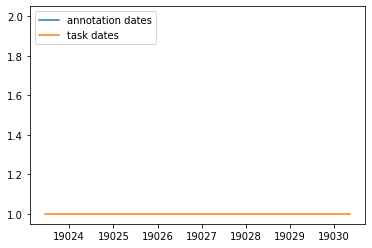

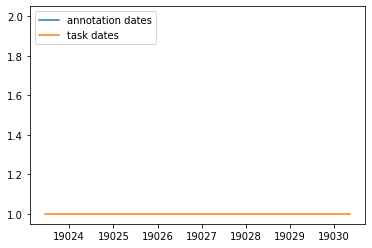

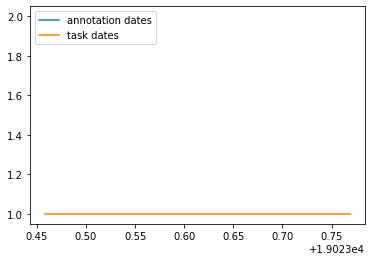

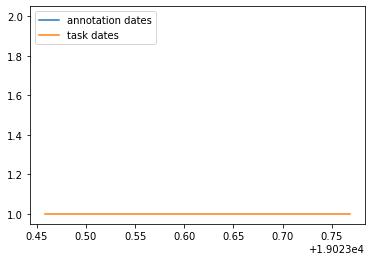

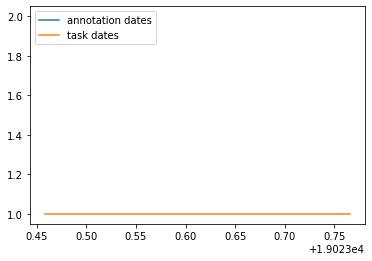

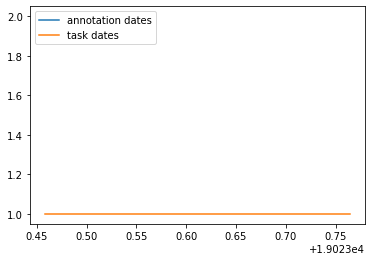

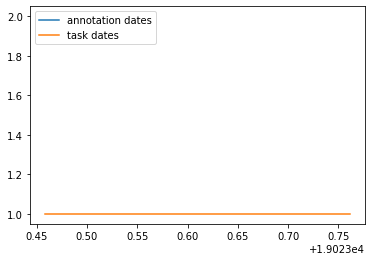

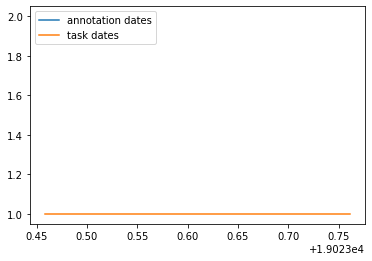

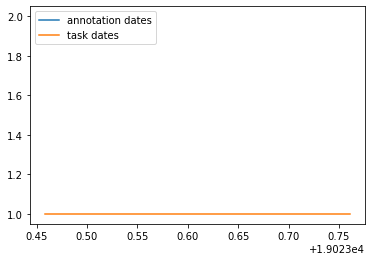

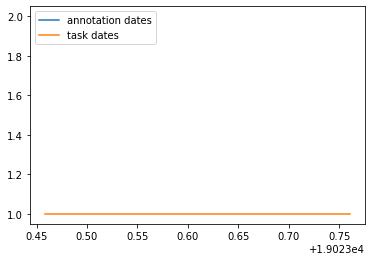

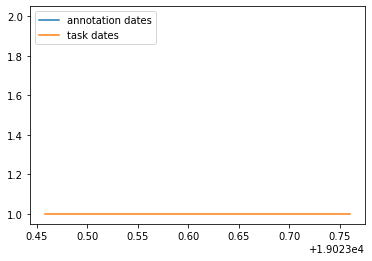

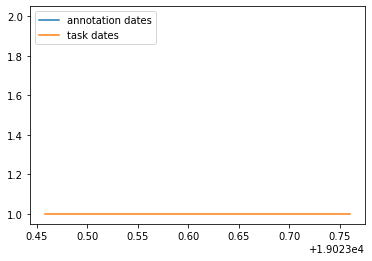

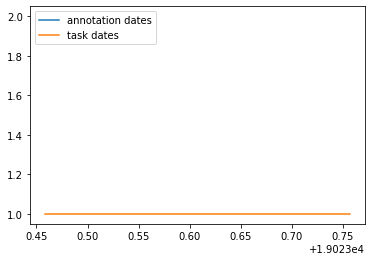

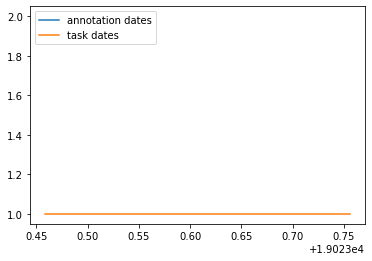

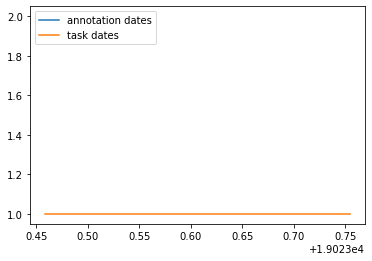

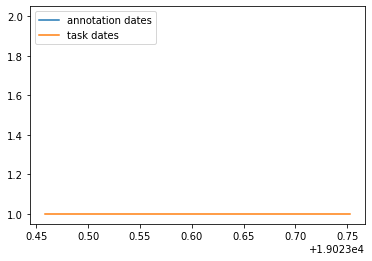

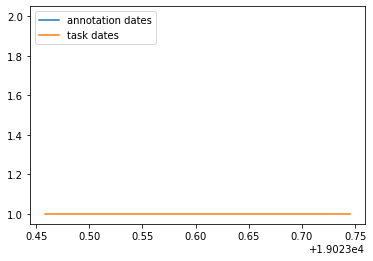

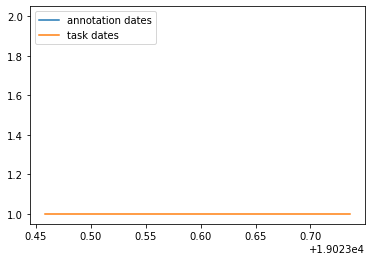

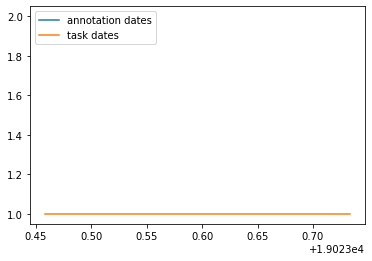

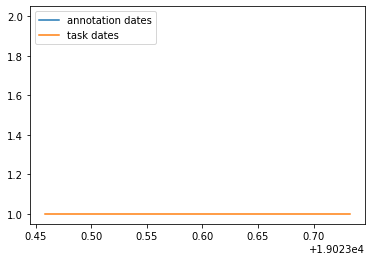

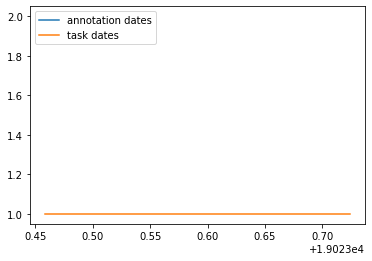

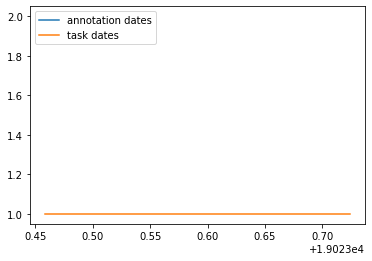

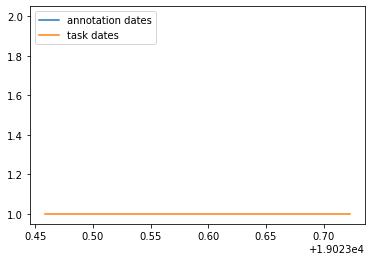

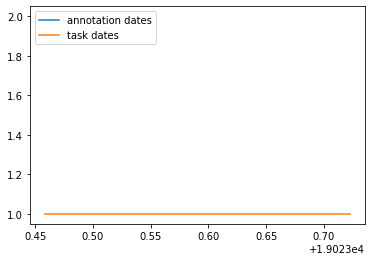

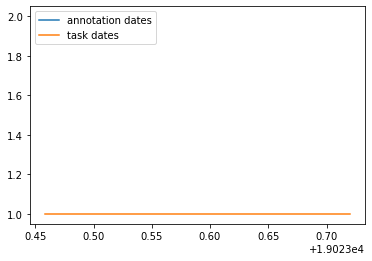

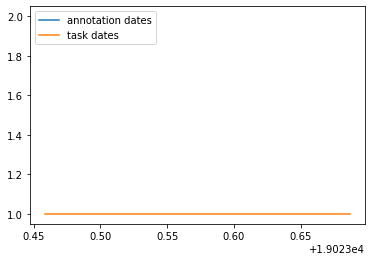

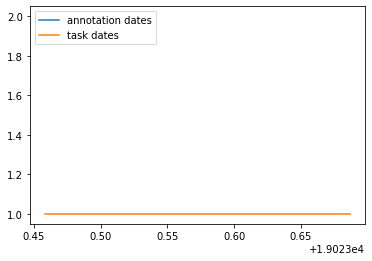

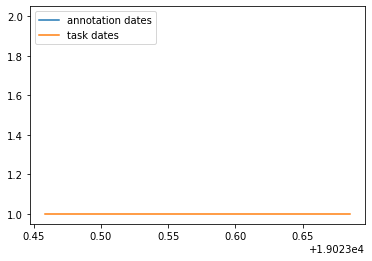

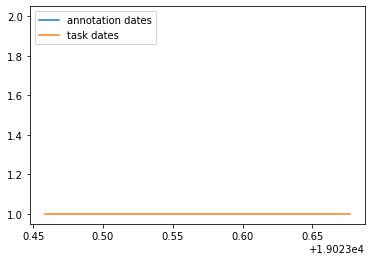

In [301]:
for i in range(len(datesdf)):
    x_ann = [datesdf['ann_creation'][i].to_pydatetime(), datesdf['ann_finish'][i].to_pydatetime()]
    y_ann = [2, 2]
    x_task = [datesdf['task_creation'][i].to_pydatetime(), datesdf['task_finish'][i].to_pydatetime()]
    y_task = [1, 1]
    dates_ann = dates.date2num(x_ann)
    dates_task = dates.date2num(x_task)
    plt.plot(dates_ann, y_ann, label = "annotation dates")
    plt.plot(dates_task, y_task, label = "task dates")
    plt.legend()
    plt.show()

[datetime.datetime(2022, 2, 7, 13, 48, 19, 45636, tzinfo=<UTC>),
 datetime.datetime(2022, 2, 9, 13, 10, 2, 110432, tzinfo=<UTC>)]

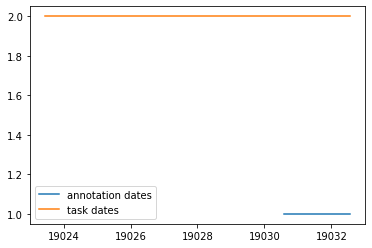

In [299]:
x_ann = [datesdf['ann_creation'][1].to_pydatetime(), datesdf['ann_finish'][1].to_pydatetime()]
y_ann = [1, 1]
x_task = [datesdf['task_creation'][1].to_pydatetime(), datesdf['task_finish'][1].to_pydatetime()]
y_task = [2, 2]
dates_ann = dates.date2num(x_ann)
dates_task = dates.date2num(x_task)
plt.plot(dates_ann, y_ann, label = "annotation dates")
plt.plot(dates_task, y_task, label = "task dates")
plt.legend()
plt.show()

In [279]:
x_values = []
y_values = [1.0, 3.0, 2.0]

dates = matplotlib.dates.date2num(x_values)
matplotlib.pyplot.plot_date(dates, y_values)

,name,ann_creation,ann_finish,task_creation,task_finish
0,receipt_00206.png,2022-02-07 14:04:36.650793+00:00,2022-02-09 13:11:04.322005+00:00,2022-01-31 11:00:35.122760+00:00,2022-02-09 13:11:04.347499+00:00
1,receipt_00705.png,2022-02-07 13:48:19.045636+00:00,2022-02-09 13:10:02.110432+00:00,2022-01-31 11:00:35.122522+00:00,2022-02-09 13:10:02.133616+00:00
2,receipt_00119.png,2022-02-07 13:42:27.858481+00:00,2022-02-09 13:08:05.467079+00:00,2022-01-31 11:00:35.122364+00:00,2022-02-09 13:08:05.489795+00:00
3,receipt_00169.png,2022-02-07 12:45:10.410941+00:00,2022-02-09 13:04:57.167345+00:00,2022-01-31 11:00:35.121883+00:00,2022-02-09 13:04:57.291210+00:00
4,receipt_00305.png,2022-02-07 12:44:50.221350+00:00,2022-02-09 13:02:19.873142+00:00,2022-01-31 11:00:35.121856+00:00,2022-02-09 13:02:19.901145+00:00
...,...,...,...,...,...
451,receipt_00085.png,2022-01-31 17:16:37.249066+00:00,2022-01-31 17:16:37.249081+00:00,2022-01-31 11:00:35.118592+00:00,2022-01-31 17:16:37.275028+00:00
452,receipt_00082.png,2022-01-31 16:28:57.472831+00:00,2022-01-31 16:28:57.472852+00:00,2022-01-31 11:00:35.118458+00:00,2022-01-31 16:28:57.503443+00:00
453,receipt_00016.png,2022-01-31 16:28:36.677103+00:00,2022-01-31 16:28:36.677120+00:00,2022-01-31 11:00:35.118431+00:00,2022-01-31 16:28:36.702045+00:00
454,receipt_00077.png,2022-01-31 16:26:34.114468+00:00,2022-01-31 16:26:34.114484+00:00,2022-01-31 11:00:35.118376+00:00,2022-01-31 16:26:34.141298+00:00


In [253]:
from shapely.geometry import box, Polygon

In [265]:
changes = list()
for n in range(len(report['annotations'])):
    changed_obj = 0
    for i in range(len(report['annotations'][n][0]['result'])):
        r = report['annotations'][n][0]['result'][i]
        if r['origin'] == 'prediction':
            pol1_xy = report['annotations'][n][0]['prediction']['result'][i]['value']['points']
            pol2_xy = r['value']['points']
            polygon1_shape = Polygon(pol1_xy)
            polygon2_shape = Polygon(pol2_xy)

            # Calculate Intersection and union, and tne IOU
            polygon_intersection = polygon1_shape.intersection(polygon2_shape).area
            polygon_union = polygon1_shape.union(polygon2_shape).area
            IOU = polygon_intersection / polygon_union 
            if IOU < 0.97:
                changed_obj += 1
    changes.append(changed_obj)

In [266]:
changes

[0,
 5,
 4,
 5,
 12,
 12,
 5,
 13,
 0,
 8,
 5,
 2,
 0,
 1,
 0,
 5,
 0,
 22,
 2,
 7,
 8,
 14,
 1,
 16,
 0,
 0,
 0,
 23,
 1,
 20,
 0,
 0,
 15,
 0,
 0,
 0,
 0,
 2,
 4,
 7,
 1,
 0,
 1,
 26,
 0,
 0,
 23,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 8,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 1,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 13,
 0,
 0,
 8,
 0,
 0,
 0,
 0,
 4,
 0,
 1,
 0,
 0,
 0,
 2,
 1,
 4,
 0,
 3,
 0,
 1,
 2,
 1,
 1,
 0,
 1,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 7,
 1,
 0,
 3,
 7,
 0,
 2,
 3,
 2,
 0,
 1,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 1,
 1,
 0,
 3,
 3,
 1,
 5,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 13,
 0,
 0,
 5,
 3,
 0,
 3,
 0,
 6,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 3,
 0,
 6,
 1,
 3,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 1,
 25,
 0,
 1,
 5,
 0,
 25,
 0,
 0,
 0,
 7,
 0,
 0,
 3,
 0,
 0,
 2,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 21,
 0,
 3,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 0,


In [267]:
data = {'name': names, 'resulting N of objects': annotation_result, 'initial N of objects': annotation_prediction, 'N of changed objects': changes, 'lead_time': lead_time, 'creation_date': creation_date, 'creation_time': creation_time, 'finish_date': finish_date, 'finish_time': finish_time}

In [268]:
pd.DataFrame.from_dict(data)

,name,resulting N of objects,initial N of objects,N of changed objects,lead_time,creation_date,creation_time,finish_date,finish_time
0,receipt_00206.png,43,28,0,4982.595,2022-02-07,14:04:37,2022-02-09,13:11:04
1,receipt_00705.png,19,12,5,4920.391,2022-02-07,13:48:19,2022-02-09,13:10:02
2,receipt_00119.png,18,13,4,4803.707,2022-02-07,13:42:28,2022-02-09,13:08:05
3,receipt_00169.png,22,16,5,4615.451,2022-02-07,12:45:10,2022-02-09,13:04:57
4,receipt_00305.png,22,17,12,4458.149,2022-02-07,12:44:50,2022-02-09,13:02:20
...,...,...,...,...,...,...,...,...,...
451,receipt_00085.png,19,15,2,1693.473,2022-01-31,17:16:37,2022-01-31,17:16:37
452,receipt_00082.png,30,30,0,19.564,2022-01-31,16:28:57,2022-01-31,16:28:57
453,receipt_00016.png,10,10,0,26.114,2022-01-31,16:28:37,2022-01-31,16:28:37
454,receipt_00077.png,23,22,0,39.425,2022-01-31,16:26:34,2022-01-31,16:26:34


In [250]:
report['annotations'][1][0]['prediction']

{'id': 119454,
 'task': 151286,
 'score': None,
 'result': [{'type': 'polygonlabels',
   'value': {'points': [[7.118055555555555, 52.54629629629629],
     [27.95138888888889, 52.54629629629629],
     [27.95138888888889, 55.092592592592595],
     [7.118055555555555, 55.092592592592595]],
    'polygonlabels': ["Печатное 'слово' (полигон)"]},
   'to_name': 'image',
   'from_name': 'label_polygon',
   'image_rotation': 0},
  {'type': 'polygonlabels',
   'value': {'points': [[75.34722222222221, 52.083333333333336],
     [86.45833333333334, 52.083333333333336],
     [86.45833333333334, 54.629629629629626],
     [75.34722222222221, 54.629629629629626]],
    'polygonlabels': ["Печатное 'слово' (полигон)"]},
   'to_name': 'image',
   'from_name': 'label_polygon',
   'image_rotation': 0},
  {'type': 'polygonlabels',
   'value': {'points': [[6.770833333333333, 59.95370370370371],
     [33.50694444444444, 59.375],
     [33.68055555555556, 62.268518518518526],
     [6.770833333333333, 62.7314814814

Timestamp('1970-01-01 00:00:00.000004920')

In [303]:
pols = list()
pred = list()
for o in report['annotations'][1][0]['result']:
    if o['origin'] == 'prediction':
        y = np.array(o['value']['points'])
        p = Polygon(y, facecolor = 'k')
        pols.append(p)
for o in report['annotations'][1][0]['prediction']['result']:
    y = np.array(o['value']['points'])
    p = Polygon(y, facecolor = 'g')
    pred.append(p)        
fig,ax = plt.subplots()
for p in pols:
    ax.add_patch(p)
for p in pred:
    ax.add_patch(p)
ax.set_xlim([0,100])
ax.set_ylim([0,100])
plt.show()      

TypeError: __init__() got an unexpected keyword argument 'facecolor'

In [147]:
import cv2 as cv
import numpy as np

In [155]:
from matplotlib import pyplot as plt

In [210]:
img = np.zeros((512,512,3), np.uint8)

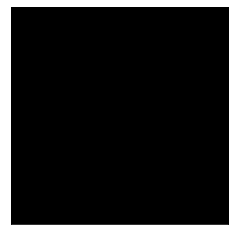

In [212]:
plt.imshow(img)
plt.xticks([]), plt.yticks([])  
plt.show()

In [218]:
pts = np.array([[3.298611111111111, 70.94907407407408],
    [15.277777777777779, 71.29629629629628],
    [14.930555555555555, 74.53703703703705],
    [3.125, 74.07407407407408]], np.int32)
pts = pts.reshape((-1,1,2))
img2 = cv.polylines(img,[pts],True,(255,0,0))

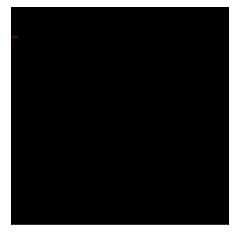

In [219]:
plt.imshow(img2)
plt.xticks([]), plt.yticks([])  
plt.show()

In [221]:
from matplotlib.patches import Polygon

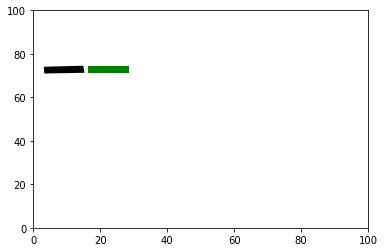

In [229]:
y = np.array([[3.298611111111111, 70.94907407407408],
    [15.277777777777779, 71.29629629629628],
    [14.930555555555555, 74.53703703703705],
    [3.125, 74.07407407407408]])

x = np.array([[16.319444444444446, 71.29629629629629],
     [28.47222222222222, 71.29629629629629],
     [28.47222222222222, 74.53703703703704],
     [16.319444444444446, 74.53703703703704]])

p1 = Polygon(y, facecolor = 'k')

p2 = Polygon(x, facecolor = 'g')

fig,ax = plt.subplots()

ax.add_patch(p1)
ax.add_patch(p2)
ax.set_xlim([0,100])
ax.set_ylim([0,100])
plt.show()

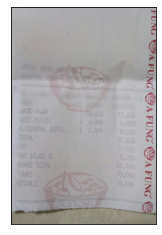

In [204]:
path = r'C:\Users\User\SberDataManager\images\images\train\receipt_00206.png'  

img = cv.imread(path, 1)  

img2 = cv.cvtColor(img, cv.COLOR_BGR2RGB) 

plt.imshow(img2)
plt.xticks([]), plt.yticks([])  
plt.show()

In [202]:
pts = np.array([[3, 700],
    [15, 700],
    [15, 740],
    [3, 740]], np.int32)
#pts = pts.reshape((-1,1,2))
img3 = cv.polylines(img2,[pts],True,(0,0,255))

In [208]:
img3 = cv.line(img,(3, 70),(15, 71),(255,0,0),5)

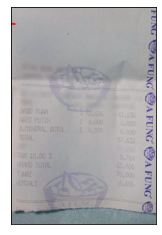

In [209]:
plt.imshow(img3)
plt.xticks([]), plt.yticks([])  
plt.show()

In [54]:
i = 0
for o in report['annotations'][0][0]['result']:
    if o['origin'] == 'prediction':
        print(o)
        i+=1
print(i)

{'id': 'tYOyQ7KoXc', 'type': 'polygonlabels', 'value': {'points': [[3.298611111111111, 70.94907407407408], [15.277777777777779, 71.29629629629628], [14.930555555555555, 74.53703703703705], [3.125, 74.07407407407408]], 'polygonlabels': ["Печатное 'слово' (полигон)"]}, 'origin': 'prediction', 'to_name': 'image', 'from_name': 'label_polygon', 'image_rotation': 0, 'original_width': 576, 'original_height': 864}
{'id': 'wTiyrD4AlD', 'type': 'polygonlabels', 'value': {'points': [[16.319444444444446, 71.29629629629628], [28.47222222222222, 71.29629629629628], [28.47222222222222, 74.53703703703705], [16.319444444444446, 74.53703703703705]], 'polygonlabels': ["Печатное 'слово' (полигон)"]}, 'origin': 'prediction', 'to_name': 'image', 'from_name': 'label_polygon', 'image_rotation': 0, 'original_width': 576, 'original_height': 864}
{'id': 'hSuuRkGHW4', 'type': 'polygonlabels', 'value': {'points': [[72.04861111111114, 71.06481481481481], [85.9375, 72.1064814814815], [85.41666666666666, 75.578703703

In [26]:
report['data'][0]

{'image': '/data/upload/cord/train/receipt_00206.png'}